In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [522]:
plt.rcParams['figure.figsize'] = [10, 5]

In [523]:
plt.style.use('fivethirtyeight')

In [524]:
df = pd.read_csv('cardata1.csv')

In [525]:
df.shape


(17798, 16)

In [526]:
df.drop('Unnamed: 0', axis=1, inplace =True)

In [527]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,region_name,min_est,max_est
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,Kilimani,1.40,1.45
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,Kilimani,2.50,2.65
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,Ridgeways,1.08,1.1
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,Langata,NaN,NaN
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,Nairobi Central,NaN,NaN


In [528]:
df['age'] = df['Year of Manufacture'].apply(lambda x: 2022-float(x))

In [529]:
df['min_est'].max()

1000.0

In [530]:
def to_float(x):
    try:
        return float(x)*1000000
    except:
        float(x.split(' ')[1])*1000000

In [531]:
filt_min = df['min_est']>45
df.loc[filt_min]
df['min_est']=df['min_est'].apply(lambda x:x/1000 if x>45 else x)
df['min_est']=df['min_est'].apply(lambda x:float(x)*1000000)

In [532]:
df['max_est']=df['max_est'].apply(lambda x:to_float(x))
df['max_est']=df['max_est'].apply(lambda x:x/1000 if x>100000000 else x)


In [547]:
df['avg_est']= (df.min_est+df.max_est)/2

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17798 entries, 0 to 17797
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Condition            17689 non-null  object 
 1   Make                 17689 non-null  object 
 2   Model                17689 non-null  object 
 3   Year of Manufacture  17689 non-null  float64
 4   Color                17776 non-null  object 
 5   Transmission         17779 non-null  object 
 6   Mileage              12449 non-null  float64
 7   selling_price        17780 non-null  float64
 8   day                  17780 non-null  object 
 9   boost                17780 non-null  object 
 10  date                 17780 non-null  object 
 11  listing_duration     17798 non-null  float64
 12  region_name          17780 non-null  object 
 13  min_est              14622 non-null  float64
 14  max_est              14621 non-null  float64
 15  age                  17689 non-null 

# Basic Data Exploration

In [550]:
df.describe()

,Year of Manufacture,Mileage,selling_price,listing_duration,min_est,max_est,age,avg_est
count,17689.000000,1.244900e+04,1.778000e+04,17798.000000,1.462200e+04,1.462100e+04,17689.000000,1.462100e+04
mean,2013.539940,9.008506e+04,2.289817e+06,53.150972,2.223525e+06,2.345967e+06,8.460060,2.284738e+06
std,3.000584,7.626886e+04,2.081253e+06,50.390343,1.868841e+06,1.981730e+06,3.000584,1.924358e+06
min,1958.000000,0.000000e+00,7.000000e+04,0.000000,2.500000e+05,2.870000e+05,0.000000,2.685000e+05
25%,2014.000000,6.000000e+04,1.100000e+06,25.000000,1.100000e+06,1.150000e+06,7.000000,1.125000e+06
50%,2014.000000,7.963700e+04,1.680000e+06,38.000000,1.650000e+06,1.710000e+06,8.000000,1.675000e+06
75%,2015.000000,1.018460e+05,2.650000e+06,61.000000,2.600000e+06,2.750000e+06,8.000000,2.665000e+06
max,2022.000000,1.980000e+06,4.500000e+07,507.000000,1.699000e+07,1.753000e+07,64.000000,1.726000e+07


In [551]:
df.max_est.max()

17530000.0

From the descrtiption above we see that:
    - The average age of a car is 8.4 years, average mileage is 90K, average price is 2.2M & the average duration is has been on sale is 53 days

In [552]:
# Filter out the major outliers;
min_sp= df['selling_price'].quantile(0.0001)
max_sp = df['selling_price'].quantile(0.999)
# max_mileage = df['Mileage'].quantile(0.999)
filt1= (df['selling_price']>=min_sp) & (df['selling_price']<=max_sp) 
df


,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,region_name,min_est,max_est,age,avg_est
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,Kilimani,1400000.0,1450000.0,10.0,1425000.0
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,Kilimani,2500000.0,2650000.0,6.0,2575000.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,Ridgeways,1080000.0,1100000.0,7.0,1090000.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,Langata,NaN,NaN,9.0,NaN
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,Nairobi Central,NaN,NaN,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4400000.0,NaN,NaN,NaN,0.0,NaN,3920000.0,4000000.0,NaN,3960000.0
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700000.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
17795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200000.0,NaN,NaN,NaN,0.0,NaN,2310000.0,2940000.0,NaN,2625000.0
17796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850000.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [553]:
df.describe()


,Year of Manufacture,Mileage,selling_price,listing_duration,min_est,max_est,age,avg_est
count,17689.000000,1.244900e+04,1.778000e+04,17798.000000,1.462200e+04,1.462100e+04,17689.000000,1.462100e+04
mean,2013.539940,9.008506e+04,2.289817e+06,53.150972,2.223525e+06,2.345967e+06,8.460060,2.284738e+06
std,3.000584,7.626886e+04,2.081253e+06,50.390343,1.868841e+06,1.981730e+06,3.000584,1.924358e+06
min,1958.000000,0.000000e+00,7.000000e+04,0.000000,2.500000e+05,2.870000e+05,0.000000,2.685000e+05
25%,2014.000000,6.000000e+04,1.100000e+06,25.000000,1.100000e+06,1.150000e+06,7.000000,1.125000e+06
50%,2014.000000,7.963700e+04,1.680000e+06,38.000000,1.650000e+06,1.710000e+06,8.000000,1.675000e+06
75%,2015.000000,1.018460e+05,2.650000e+06,61.000000,2.600000e+06,2.750000e+06,8.000000,2.665000e+06
max,2022.000000,1.980000e+06,4.500000e+07,507.000000,1.699000e+07,1.753000e+07,64.000000,1.726000e+07


Mean Price = 2.26M
Mean Mileage = 90K
mean age = 8.4 years
mean duration = 53 days






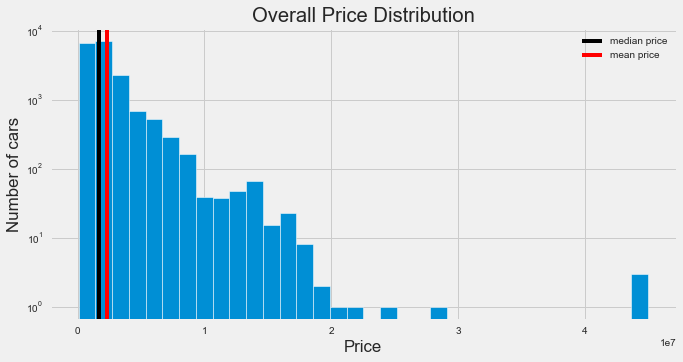

In [554]:
# Price distribution
values = df['selling_price']

plt.title('Overall Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
median_price = df['selling_price'].median()
mean_price = df['selling_price'].mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

#Plot the hist
plt.legend()
plt.hist(values, bins=34, log=True, edgecolor='white')
plt.show()

In [555]:
def overall_distribution(x):
    # Price distribution
    values = df[x]

    plt.title('Overall Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Number of cars')

    #Add the median & mean lines
    median_price = df['selling_price'].median()
    mean_price = df['selling_price'].mean()
    plt.axvline(median_price, color='black', label= 'median price')
    plt.axvline(mean_price, color='red', label= 'mean price')

    #Plot the hist
    plt.legend()
    plt.hist(values, bins=34, log=True, edgecolor='white')
    plt.show()

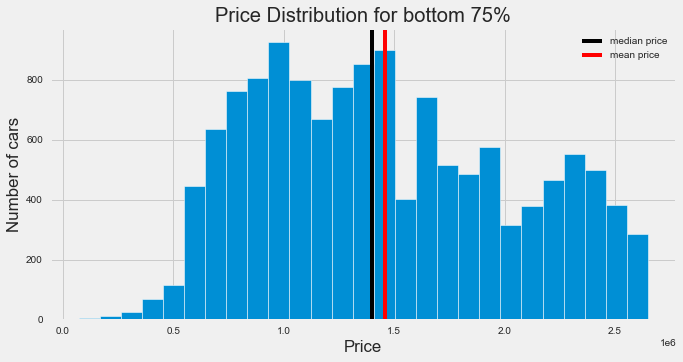

In [557]:
#Price distrinution for cars less than 75th percentile

pct75 = df['selling_price'].quantile(0.75)
filt75 = df['selling_price']<=pct75
values = df.loc[filt75]['selling_price']

plt.title('Price Distribution for bottom 75%')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
# median_price = df['selling_price'].median()
median_price = values.median()
# mean_price = df['selling_price'].mean()
mean_price = values.mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

plt.legend()

#Plot the hist
plt.hist(values, bins=27, edgecolor='white')
plt.show()

In [558]:
def hist_75pct(parameter):
    #Price distrinution for cars less than 75th percentile

    pct75 = df[parameter].quantile(0.75)
    filt75 = df[parameter]<=pct75
    values = df.loc[filt75][parameter]

    plt.title(f'{parameter} Distribution for bottom 75%')
    plt.xlabel(f'{parameter}')
    plt.ylabel('Number of cars')

    #Add the median & mean lines
    # median_price = df['selling_price'].median()
    median_price = values.median()
    # mean_price = df['selling_price'].mean()
    mean_price = values.mean()
    plt.axvline(median_price, color='black', label= 'median price')
    plt.axvline(mean_price, color='red', label= 'mean price')

    plt.legend()

    #Plot the hist
    plt.hist(values, bins=27, edgecolor='white')
    plt.show()

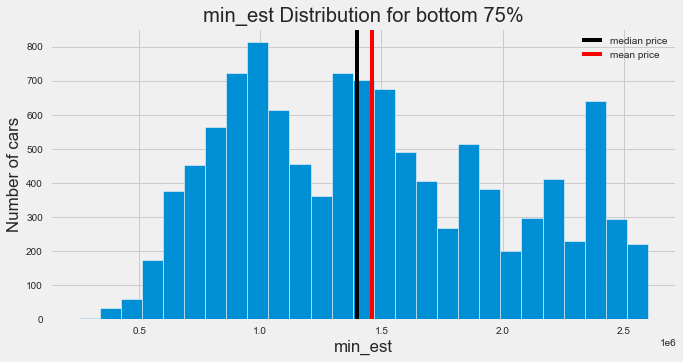

In [559]:
hist_75pct('min_est')

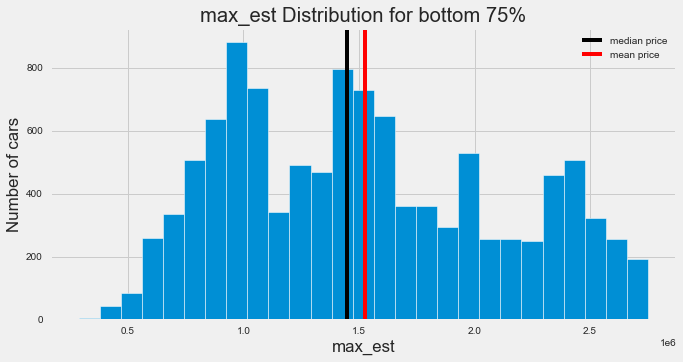

In [560]:
hist_75pct('max_est')

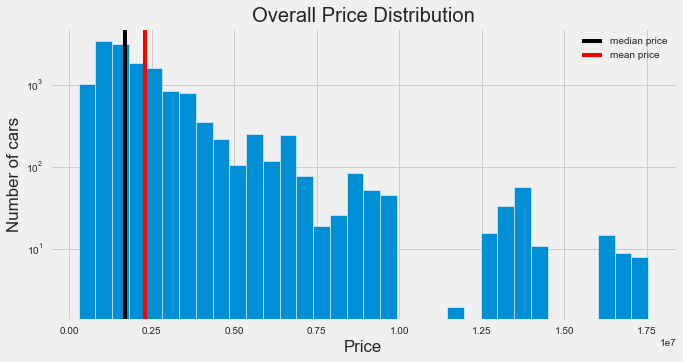

In [561]:
overall_distribution('max_est')

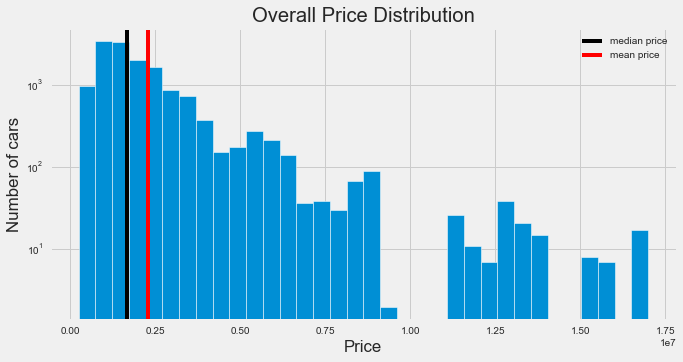

In [562]:
overall_distribution('min_est')

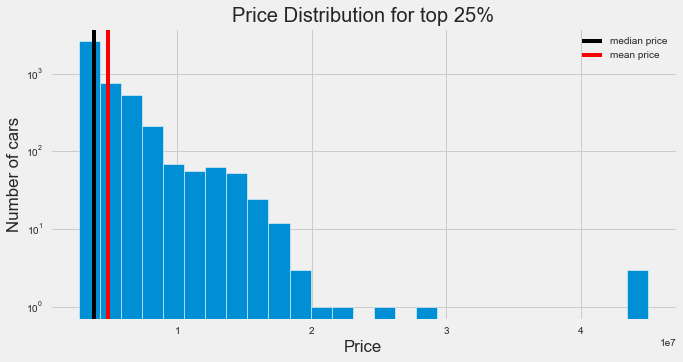

In [563]:
pct75 = df['selling_price'].quantile(0.75)
filt75 = df['selling_price']>pct75
values = df.loc[filt75]['selling_price']

plt.title('Price Distribution for top 25%')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
# median_price = df['selling_price'].median()
median_price = values.median()
# mean_price = df['selling_price'].mean()
mean_price = values.mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

#Plot the hist
plt.legend()
plt.hist(values, bins=27,log=True,  edgecolor='white')
plt.show()

Other Distibutions

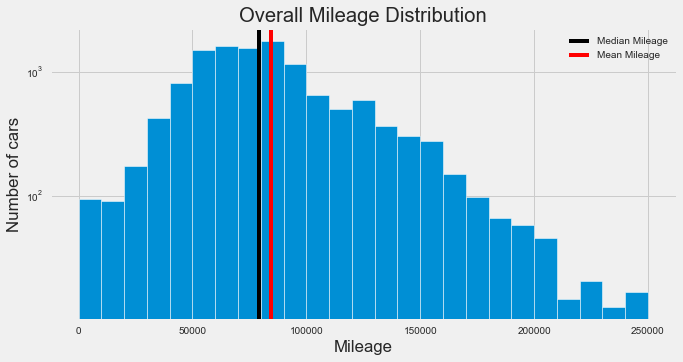

In [564]:
# Mileage
pct99 = df['Mileage'].quantile(0.99)
filt_mil = df['Mileage']<=pct99
values = df.loc[filt_mil]['Mileage']

plt.title('Overall Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Mileage')
plt.axvline(mean_mil, color='red', label= 'Mean Mileage')

#Plot the hist
plt.legend()
plt.hist(values, bins=25, log=True, edgecolor='white')
plt.show()

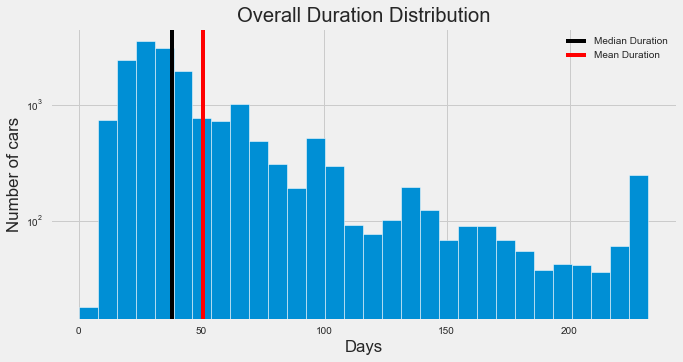

In [565]:
# duration distribution

pct99 = df['listing_duration'].quantile(0.99)
filt_mil = df['listing_duration']<=pct99
values = df.loc[filt_mil]['listing_duration']

# values = df['listing_duration']

plt.title('Overall Duration Distribution')
plt.xlabel('Days')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Duration')
plt.axvline(mean_mil, color='red', label= 'Mean Duration')

#Plot the hist
plt.legend()
plt.hist(values, bins=30,log=True,  edgecolor='white')
plt.show()

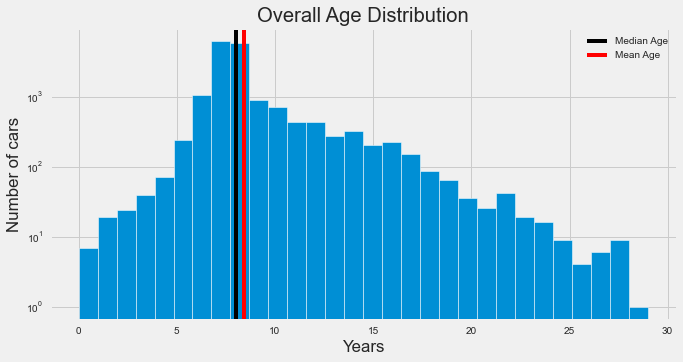

In [566]:
# Age

pct99 = df['age'].quantile(0.999)
filt_mil = df['age']<=pct99
values = df.loc[filt_mil]['age']

# values = df['listing_duration']

plt.title('Overall Age Distribution')
plt.xlabel('Years')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Age')
plt.axvline(mean_mil, color='red', label= 'Mean Age')

#Plot the hist
plt.legend()
plt.hist(values, bins=30,log=True,  edgecolor='white')
plt.show()

In [567]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,region_name,min_est,max_est,age,avg_est
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,Kilimani,1400000.0,1450000.0,10.0,1425000.0
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,Kilimani,2500000.0,2650000.0,6.0,2575000.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,Ridgeways,1080000.0,1100000.0,7.0,1090000.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,Langata,NaN,NaN,9.0,NaN
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,Nairobi Central,NaN,NaN,8.0,NaN


# Checking Condition, transmission, color

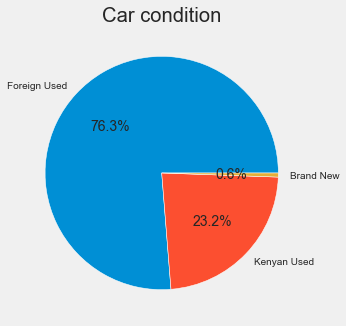

In [568]:
df_cdn= df.Condition.value_counts().rename_axis('cdn').to_frame('counts').reset_index()
data= df_cdn['counts']
labels = df_cdn['cdn']
plt.title('Car condition')
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'white'})
plt.show()

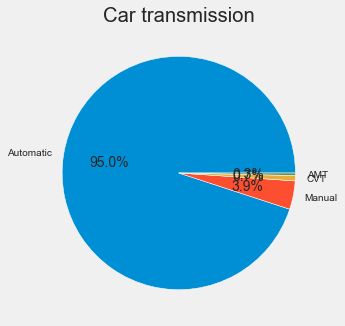

In [569]:
df_transmission= df.Transmission.value_counts().rename_axis('Transmission').to_frame('counts').reset_index()
data= df_transmission['counts']
labels = df_transmission['Transmission']
plt.title('Car transmission')
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'white'})
plt.show()

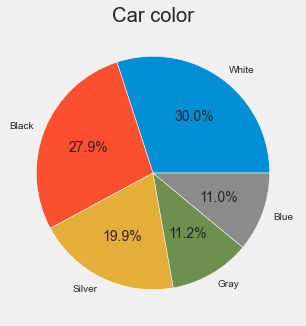

In [570]:
df_cdn= df.Color.value_counts().rename_axis('cdn').to_frame('counts').reset_index()
data= df_cdn['counts'][:5]
labels = df_cdn['cdn'][:5]
plt.title('Car color')
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'white'})
plt.show()

In [571]:
df['Year of Manufacture'].value_counts()

2015.0    6239
2014.0    5929
2016.0    1068
2013.0     920
2012.0     727
2011.0     438
2010.0     437
2008.0     326
2009.0     276
2017.0     240
2006.0     230
2007.0     208
2005.0     151
2004.0      87
2018.0      72
2003.0      65
2000.0      42
2019.0      40
2002.0      36
2001.0      26
2020.0      24
2021.0      19
1999.0      19
1998.0      16
1994.0       9
1997.0       9
2022.0       7
1995.0       6
1996.0       4
1986.0       4
1990.0       3
1991.0       2
1962.0       2
1958.0       1
1977.0       1
1961.0       1
1992.0       1
1978.0       1
1980.0       1
1983.0       1
1993.0       1
Name: Year of Manufacture, dtype: int64

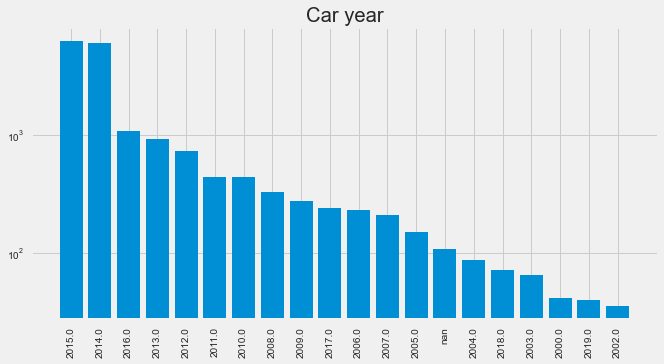

In [572]:
df['Year of Manufacture'] = df['Year of Manufacture'].astype(str)
df_cdn= df['Year of Manufacture'].value_counts().rename_axis('cdn').to_frame('counts').reset_index()
data= df_cdn['counts'][:20]
labels = df_cdn['cdn'][:20]
plt.title('Car year')

plt.yscale('log')
plt.xticks(rotation=90)
plt.bar(labels, data)
# plt.hist(data)
plt.show()

In [ ]:
df_cdn= df.Color.value_counts().rename_axis('cdn').to_frame('counts').reset_index()
data= df_cdn['counts']
labels = df_cdn['cdn']
plt.title('Car color')

plt.xticks(rotation=90)
plt.bar(labels, data)
plt.show()

# Makes & Models

In [169]:
df_makes= df.Make.value_counts().rename_axis('Make').to_frame('counts').reset_index()

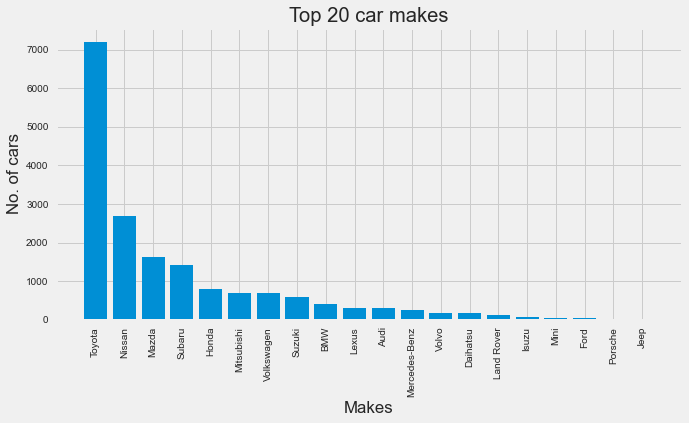

In [179]:
x=df_makes[:20]['Make']
y=df_makes[:20]['counts']

plt.xlabel('Makes')
plt.ylabel('No. of cars')
plt.title('Top 20 car makes')

# plt.yscale('log')
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

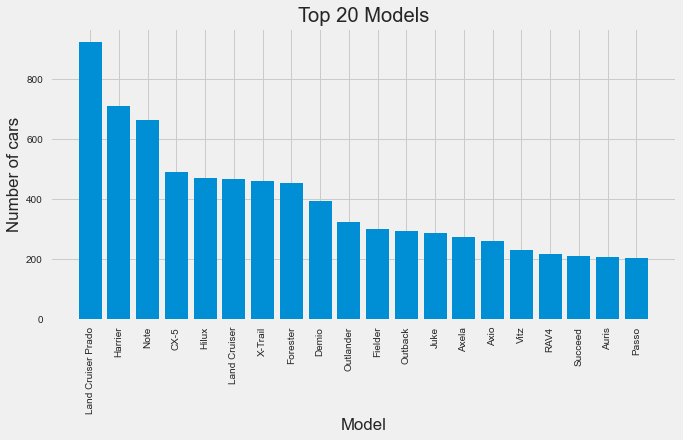

<Figure size 1296x1152 with 0 Axes>

In [177]:
#using barh to make a horizontal bar chart
df_models= df.Model.value_counts().rename_axis('Model').to_frame('Counts').reset_index()
df_models


x=df_models[:20]['Model']
y=df_models[:20]['Counts']

plt.xlabel('Model')
plt.ylabel('Number of cars')
plt.title('Top 20 Models')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.figure(figsize=(18, 16))
plt.show()

# Makes: Price, age, mileage, duration Analysis

In [573]:
df.shape

(17798, 17)

In [574]:
# makes = df.

In [575]:
makes_grp = df.groupby('Make')

In [576]:
df_car_make=makes_grp['listing_duration','age', 'Mileage', 'selling_price', 'min_est', 'max_est', 'avg_est'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_7828\1156732612.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_make=makes_grp['listing_duration','age', 'Mileage', 'selling_price', 'min_est', 'max_est', 'avg_est'].mean()


In [577]:
df_car_make

,listing_duration,age,Mileage,selling_price,min_est,max_est,avg_est
Make,,,,,,,
Alfa Romeo,65.000000,10.000000,NaN,2.749286e+06,3.972000e+06,4.320000e+06,4.146000e+06
Audi,48.625000,7.967105,86400.004831,2.377380e+06,2.326378e+06,2.467517e+06,2.396947e+06
BMW,57.955665,8.366995,77575.024476,2.389778e+06,2.340699e+06,2.475442e+06,2.408071e+06
Bentley,65.000000,7.000000,40000.000000,2.299999e+06,NaN,NaN,NaN
Cadillac,48.000000,13.000000,30000.000000,1.950000e+06,1.950000e+06,1.980000e+06,1.965000e+06
Chevrolet,43.000000,8.333333,116000.000000,1.200000e+06,1.120000e+06,1.150000e+06,1.135000e+06
Chrysler,22.000000,15.000000,120000.000000,1.800000e+06,1.940000e+06,2.020000e+06,1.980000e+06
Citroen,51.785714,7.857143,97153.923077,2.605000e+06,2.478286e+06,2.580191e+06,2.529238e+06
Daihatsu,34.926829,7.500000,80379.240000,2.504116e+06,2.471044e+06,2.590124e+06,2.530584e+06


In [581]:
#create a df from valuecounts
df_makes= df.Make.value_counts().rename_axis('Make').to_frame('counts').reset_index()
df_makes.set_index('Make', inplace=True)

In [582]:
df_makes.head()

,counts
Make,
Toyota,7202
Nissan,2700
Mazda,1617
Subaru,1421
Honda,802


In [583]:
df_makes=df_makes.join(df_car_make)
df_makes

,counts,listing_duration,age,Mileage,selling_price,min_est,max_est,avg_est
Make,,,,,,,,
Toyota,7202,55.444043,8.798667,92076.096381,2.301837e+06,2.247469e+06,2.374369e+06,2.310919e+06
Nissan,2700,51.051852,8.391852,93058.994958,2.273145e+06,2.191501e+06,2.313125e+06,2.252313e+06
Mazda,1617,52.772418,7.631416,81882.927920,2.166563e+06,2.059205e+06,2.164420e+06,2.111812e+06
Subaru,1421,55.542576,8.160450,93176.673807,2.292842e+06,2.264280e+06,2.382947e+06,2.323613e+06
Honda,802,49.445137,7.975062,81418.229779,2.166607e+06,2.101053e+06,2.217090e+06,2.159071e+06
Mitsubishi,704,56.818182,8.799716,90234.880165,2.271317e+06,2.135774e+06,2.252440e+06,2.194107e+06
Volkswagen,685,55.775182,8.110949,78789.561135,2.473223e+06,2.296704e+06,2.421151e+06,2.358928e+06
Suzuki,582,53.505155,7.554983,90791.041995,2.159295e+06,2.150064e+06,2.267639e+06,2.208852e+06
BMW,406,57.955665,8.366995,77575.024476,2.389778e+06,2.340699e+06,2.475442e+06,2.408071e+06


In [584]:
# plots for average prices
df_makes.reset_index(inplace=True)

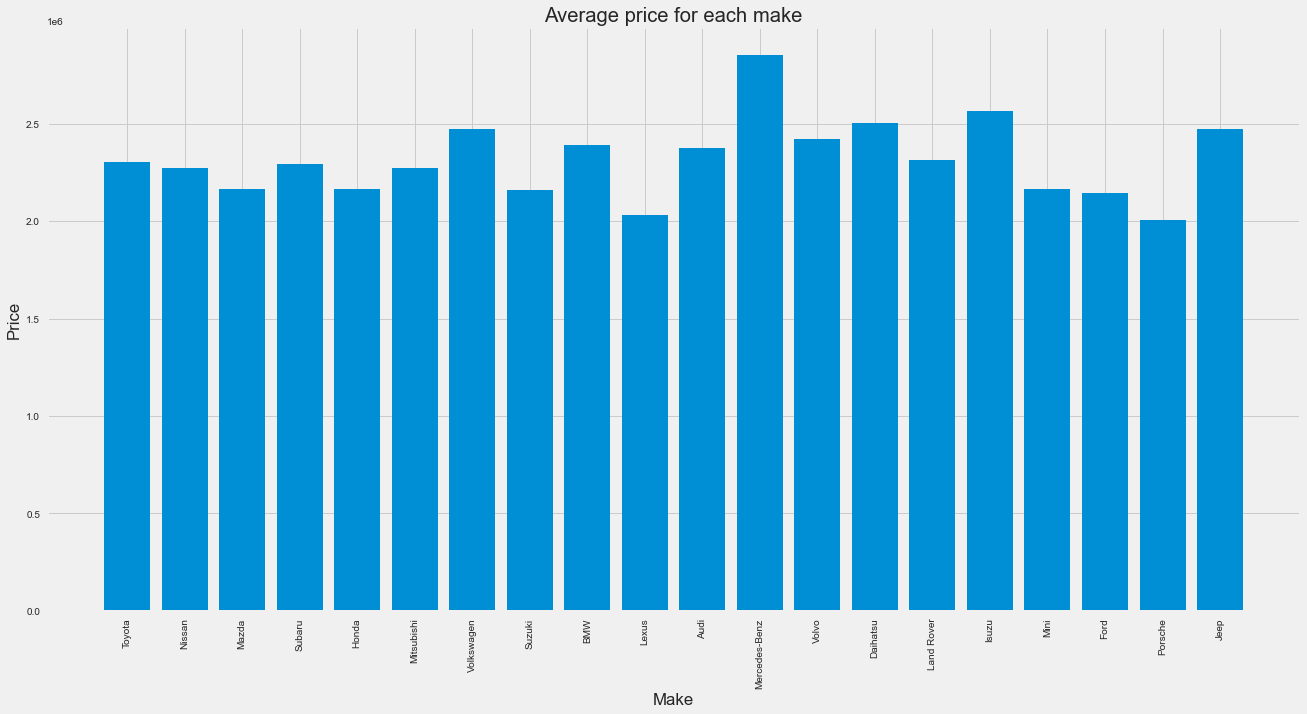

In [610]:
# plots for average prices
x= df_makes[:20]['Make']
y=df_makes[:20]['selling_price']

plt.title('Average price for each make')
plt.xlabel('Make')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

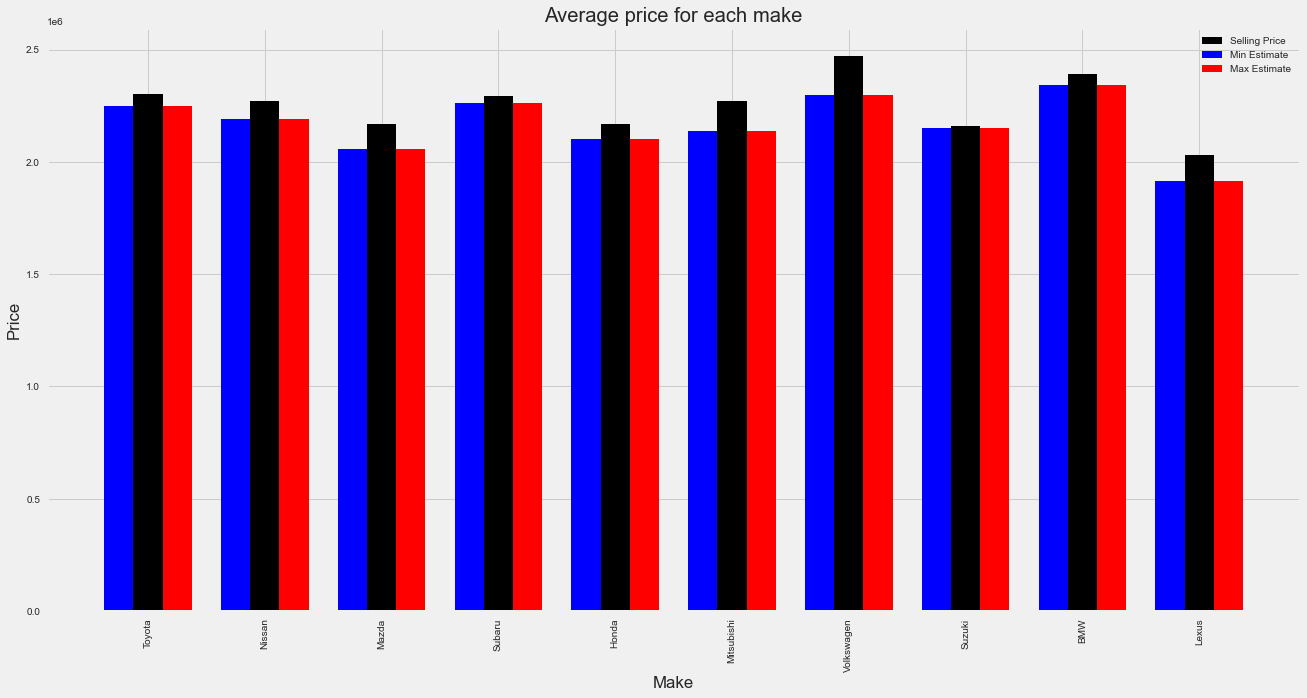

In [628]:
# plots for average prices, min stestimates & maximum estimates
x_ticks= df_makes[:10]['Make']
x=np.arange(10)
w =0.25
y1=df_makes[:10]['selling_price']
y2=df_makes[:10]['min_est']
y3=df_makes[:10]['max_est']


plt.title('Average price for each make')
plt.xlabel('Make')
plt.ylabel('Price')

plt.xticks(x, x_ticks)
plt.xticks(rotation=90)
plt.bar(x, y1, color='black', width=w, label = 'Selling Price')
plt.bar(x-w, y2, color='blue', width=w, label ='Min Estimate')
plt.bar(x+w, y2, color='red', width=w, label ='Max Estimate')
plt.legend()
plt.show()

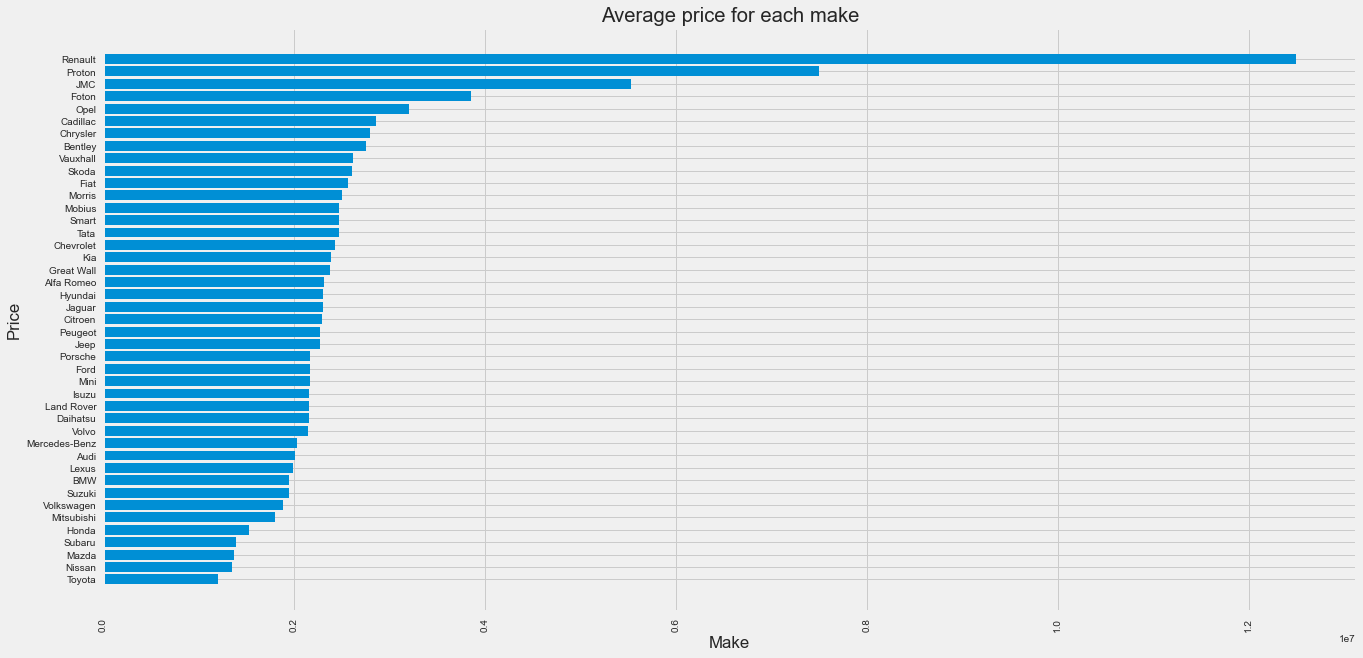

In [609]:
plt.rcParams['figure.figsize'] = [20, 10]
x= df_makes[:50]['Make']
y=df_makes[:50]['selling_price'].sort_values()

plt.title('Average price for each make')
plt.xlabel('Make')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.barh(x, y)

plt.show()

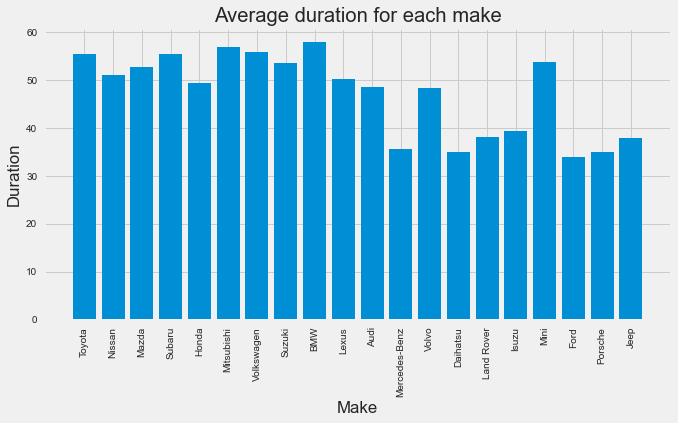

In [586]:
# plots for duration prices
x= df_makes[:20]['Make']
y=df_makes[:20]['listing_duration']

plt.title('Average duration for each make')
plt.xlabel('Make')
plt.ylabel('Duration')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

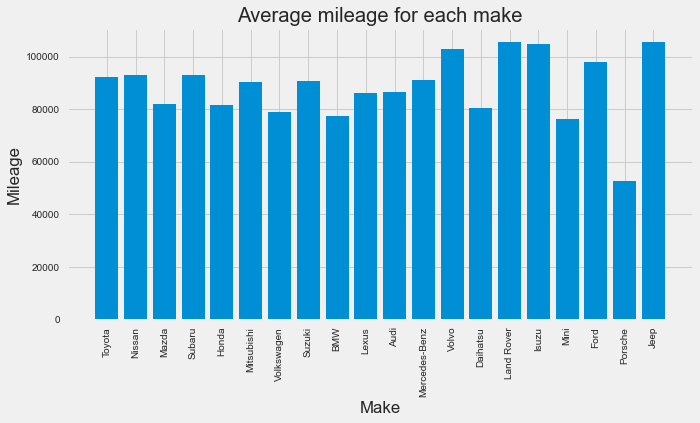

In [587]:
# plots for Mileage prices
x= df_makes[:20]['Make']
y=df_makes[:20]['Mileage']

plt.title('Average mileage for each make')
plt.xlabel('Make')
plt.ylabel('Mileage')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

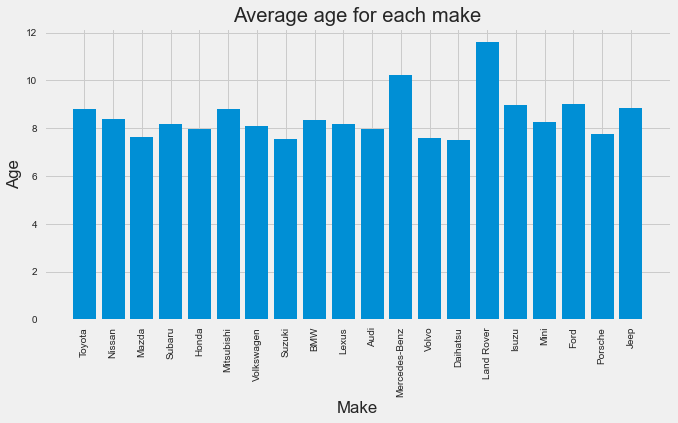

In [588]:
# plots for mean age
x= df_makes[:20]['Make']
y=df_makes[:20]['age']

plt.title('Average age for each make')
plt.xlabel('Make')
plt.ylabel('Age')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

# Models: Price, age, mileage & duration analysis

In [591]:
models_grp = df.groupby('Model')

In [592]:
df_car_models=models_grp['listing_duration','age', 'Mileage', 'selling_price', 'min_est', 'max_est', 'avg_est'].mean()
df_car_models['median_price'] = models_grp['selling_price'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_7828\3908718704.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_models=models_grp['listing_duration','age', 'Mileage', 'selling_price', 'min_est', 'max_est', 'avg_est'].mean()


In [593]:
df_car_models

,listing_duration,age,Mileage,selling_price,min_est,max_est,avg_est,median_price
Model,,,,,,,,
1.8,41.000000,7.000000,55483.000000,1.097500e+06,7.953333e+05,8.201667e+05,8.077500e+05,1.097500e+06
100,48.500000,9.500000,114636.000000,9.400000e+05,9.750000e+05,1.040500e+06,1.007750e+06,9.400000e+05
116i,75.196970,7.893939,73328.900000,2.124015e+06,2.052588e+06,2.177893e+06,2.115240e+06,2.124015e+06
120i,21.333333,7.333333,65464.000000,2.756667e+06,2.670000e+06,2.933333e+06,2.801667e+06,2.756667e+06
1400,49.000000,25.000000,253322.000000,5.200000e+06,3.520000e+06,3.700000e+06,3.610000e+06,5.200000e+06
...,...,...,...,...,...,...,...,...
XV,54.106383,7.595745,81560.436782,2.134582e+06,2.203941e+06,2.320385e+06,2.262163e+06,2.134582e+06
Xenon,31.000000,5.000000,32590.000000,3.000000e+06,NaN,NaN,NaN,3.000000e+06
Yaris,13.000000,1.000000,NaN,7.050000e+06,5.700000e+06,6.500000e+06,6.100000e+06,7.050000e+06


In [594]:
#creating df from valuecounts
df_models= df.Model.value_counts().rename_axis('Model').to_frame('Counts').reset_index()
df_models.set_index('Model', inplace=True)

In [595]:
# using join to merge two dataframes
df_models=df_models.join(df_car_models)

In [596]:
df_car_models.head()

,listing_duration,age,Mileage,selling_price,min_est,max_est,avg_est,median_price
Model,,,,,,,,
1.8,41.000000,7.000000,55483.0,1.097500e+06,7.953333e+05,8.201667e+05,8.077500e+05,1.097500e+06
100,48.500000,9.500000,114636.0,9.400000e+05,9.750000e+05,1.040500e+06,1.007750e+06,9.400000e+05
116i,75.196970,7.893939,73328.9,2.124015e+06,2.052588e+06,2.177893e+06,2.115240e+06,2.124015e+06
120i,21.333333,7.333333,65464.0,2.756667e+06,2.670000e+06,2.933333e+06,2.801667e+06,2.756667e+06
1400,49.000000,25.000000,253322.0,5.200000e+06,3.520000e+06,3.700000e+06,3.610000e+06,5.200000e+06


In [597]:
df_models

,Counts,listing_duration,age,Mileage,selling_price,min_est,max_est,avg_est,median_price
Model,,,,,,,,,
Land Cruiser Prado,923,58.505959,9.184182,88291.924890,2.448624e+06,2.459143e+06,2.602301e+06,2.530722e+06,2.448624e+06
Harrier,709,60.431594,8.677010,85822.875969,2.315784e+06,2.235932e+06,2.357899e+06,2.296916e+06,2.315784e+06
Note,664,45.597892,7.539157,89249.813278,2.218380e+06,2.167426e+06,2.293659e+06,2.230542e+06,2.218380e+06
CX-5,492,55.398374,7.552846,78184.762295,2.245432e+06,2.172188e+06,2.273896e+06,2.223042e+06,2.245432e+06
Hilux,470,69.295745,8.521277,103637.150289,2.352247e+06,2.300873e+06,2.451044e+06,2.375958e+06,2.352247e+06
...,...,...,...,...,...,...,...,...,...
CLA-Class,1,16.000000,7.000000,62000.000000,1.400000e+06,1.620000e+06,1.670000e+06,1.645000e+06,1.400000e+06
Corolla II,1,15.000000,24.000000,240000.000000,8.500000e+06,5.400000e+06,5.500000e+06,5.450000e+06,8.500000e+06
404,1,17.000000,45.000000,NaN,1.180000e+06,9.000000e+05,9.770000e+05,9.385000e+05,1.180000e+06


In [598]:
df_models.head()

,Counts,listing_duration,age,Mileage,selling_price,min_est,max_est,avg_est,median_price
Model,,,,,,,,,
Land Cruiser Prado,923,58.505959,9.184182,88291.924890,2.448624e+06,2.459143e+06,2.602301e+06,2.530722e+06,2.448624e+06
Harrier,709,60.431594,8.677010,85822.875969,2.315784e+06,2.235932e+06,2.357899e+06,2.296916e+06,2.315784e+06
Note,664,45.597892,7.539157,89249.813278,2.218380e+06,2.167426e+06,2.293659e+06,2.230542e+06,2.218380e+06
CX-5,492,55.398374,7.552846,78184.762295,2.245432e+06,2.172188e+06,2.273896e+06,2.223042e+06,2.245432e+06
Hilux,470,69.295745,8.521277,103637.150289,2.352247e+06,2.300873e+06,2.451044e+06,2.375958e+06,2.352247e+06


In [630]:
df_models.reset_index(inplace=True)

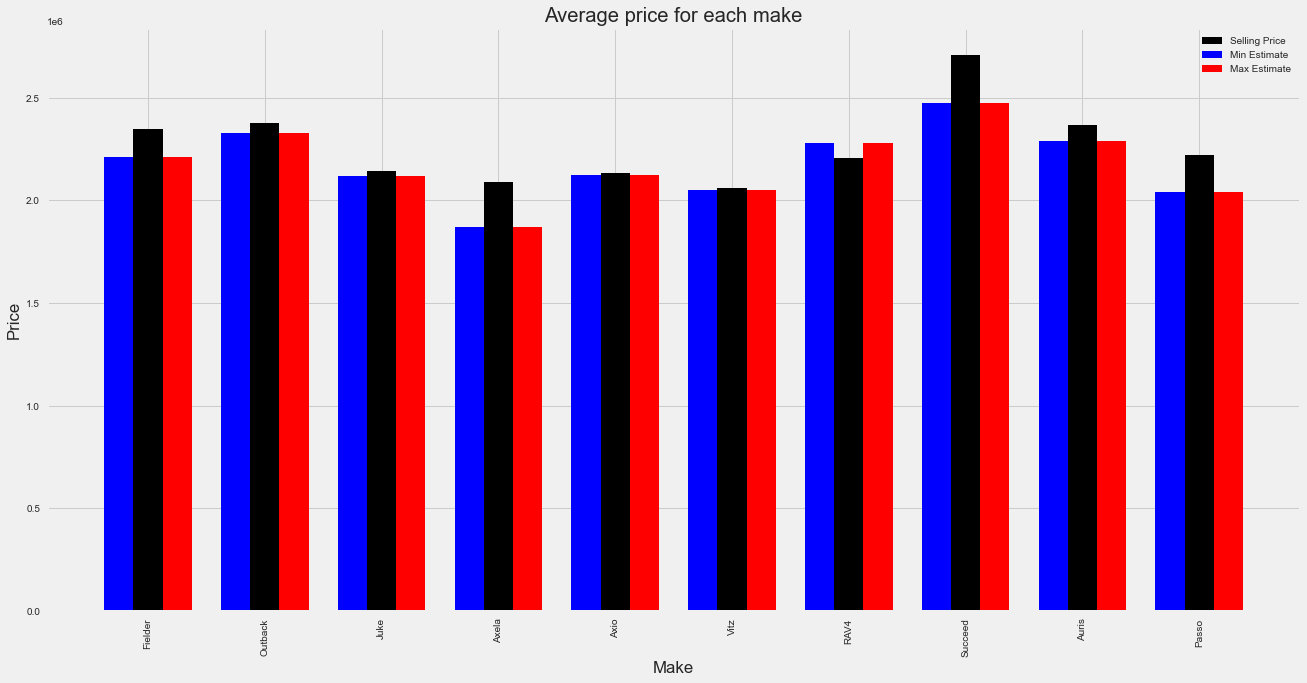

In [634]:
# plots for average prices, min stestimates & maximum estimates
x_ticks= df_models[10:20]['Model']
x=np.arange(10)
w =0.25
y1=df_models[10:20]['selling_price']
y2=df_models[10:20]['min_est']
y3=df_models[10:20]['max_est']


plt.title('Average price for each make')
plt.xlabel('Make')
plt.ylabel('Price')

plt.xticks(x, x_ticks)
plt.xticks(rotation=90)
plt.bar(x, y1, color='black', width=w, label = 'Selling Price')
plt.bar(x-w, y2, color='blue', width=w, label ='Min Estimate')
plt.bar(x+w, y2, color='red', width=w, label ='Max Estimate')
plt.legend()
plt.show()

In [309]:
def plot_model_bars(parameter):
    x= df_models[:30]['Model']
    y=df_models[:30][parameter]

    plt.title(f'Average {parameter} for each model')
    plt.xlabel('Model')
    plt.ylabel(parameter)

    plt.xticks(rotation=90)
    plt.bar(x, y)

    plt.show()

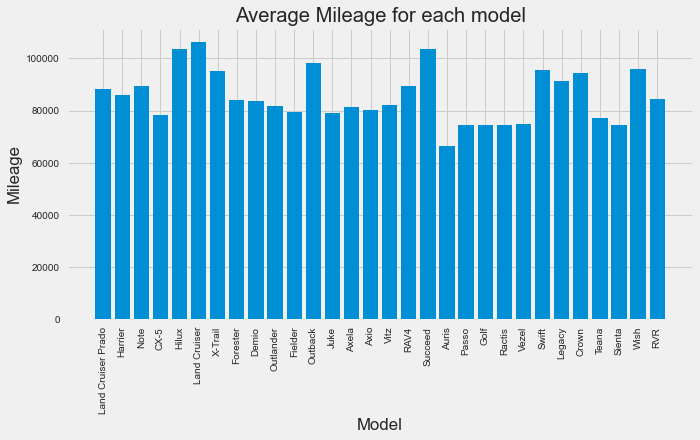

In [310]:
plot_model_bars('Mileage')

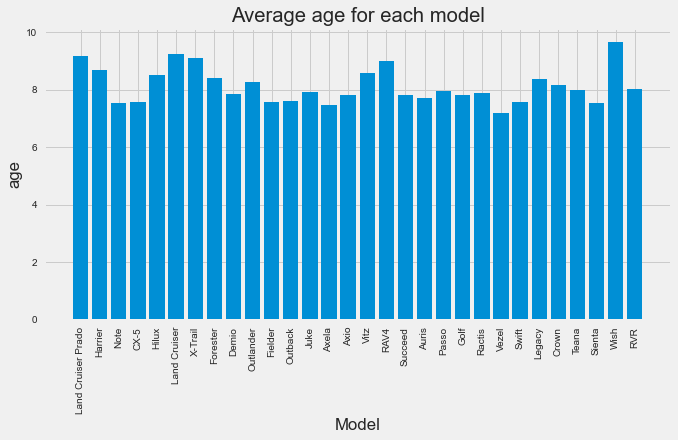

In [311]:
plot_model_bars('age')

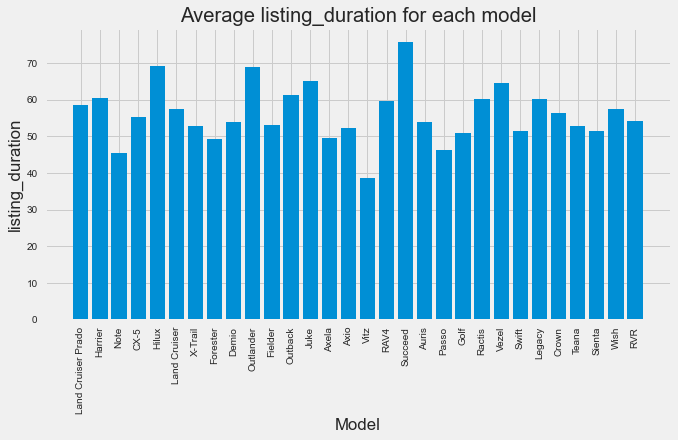

In [312]:
plot_model_bars('listing_duration')

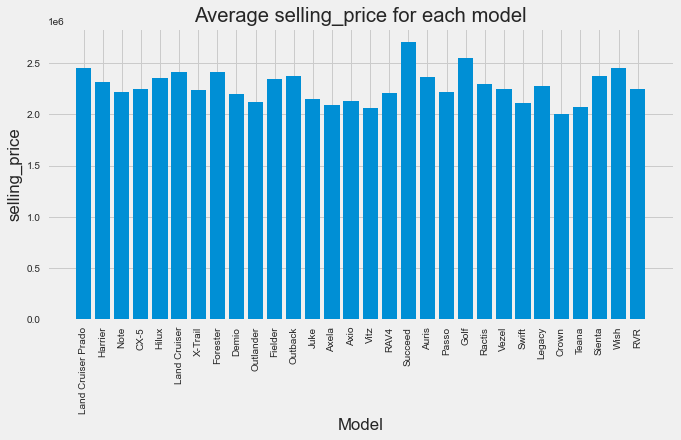

In [313]:
plot_model_bars('selling_price')

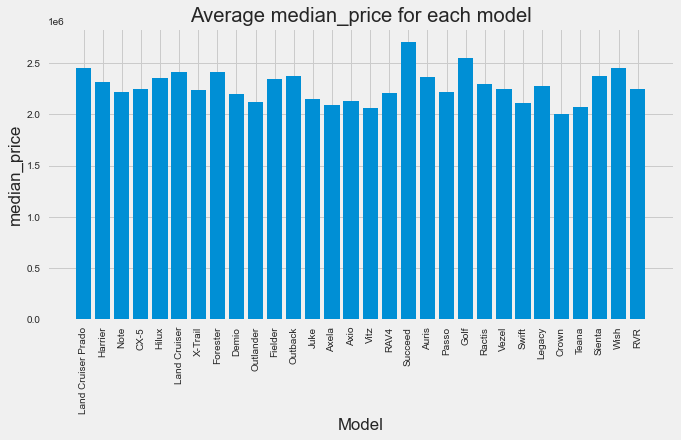

In [316]:
plot_model_bars('median_price')

In [315]:
filt_note = df['Model']=='Axio'
df.loc[filt_note]['selling_price'].max()

13000000.0

# Analysis for different regions

In [348]:
df_regions= df.region_name.value_counts().rename_axis('region_name').to_frame('counts').reset_index()
df_regions

,region_name,counts
0,Mombasa CBD,7831
1,Kilimani,1716
2,Nairobi Central,1339
3,Ridgeways,1073
4,Mvita,788
...,...,...
120,Gilgil,1
121,Nkuene,1
122,Bura,1
123,Malindi,1


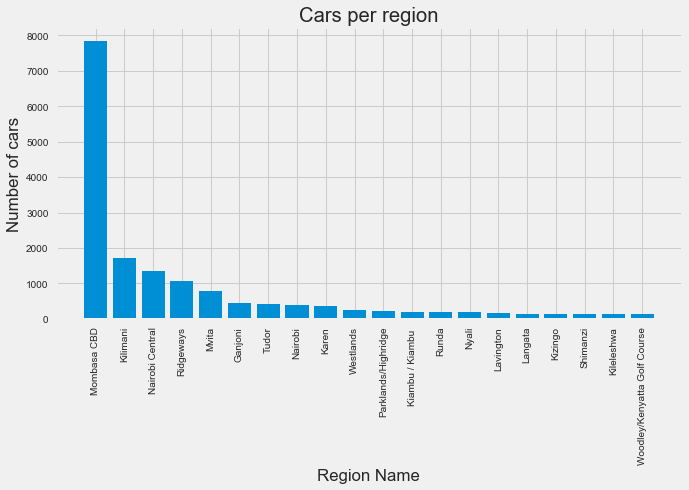

In [356]:
# Bar plots for regions

# values
x=df_regions.region_name[:20]
y=df_regions.counts[:20]

plt.title('Cars per region')
plt.xlabel('Region Name')
plt.ylabel('Number of cars')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

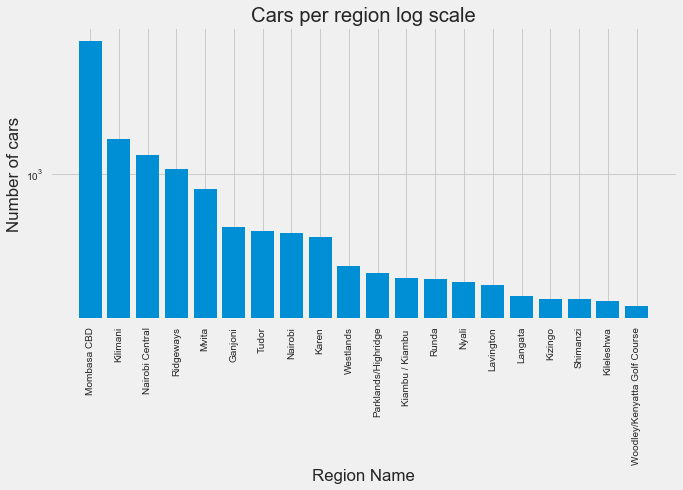

In [354]:
# values on log scale
x=df_regions.region_name[:20]
y=df_regions.counts[:20]

plt.title('Cars per region log scale')
plt.xlabel('Region Name')
plt.ylabel('Number of cars')

plt.yscale('log')
plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

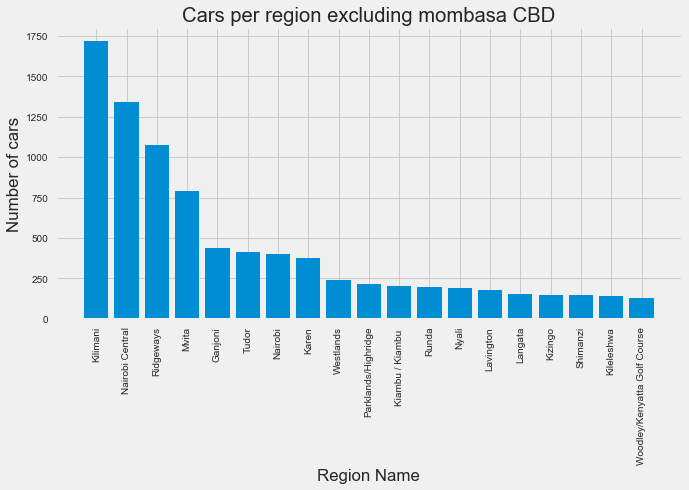

In [358]:
# values
x=df_regions.region_name[1:20]
y=df_regions.counts[1:20]

plt.title('Cars per region excluding mombasa CBD')
plt.xlabel('Region Name')
plt.ylabel('Number of cars')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

In [359]:
region_group = df.groupby('region_name')

In [360]:
df_car_regions=region_group['listing_duration','age', 'Mileage', 'selling_price'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_7828\1673662236.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_regions=region_group['listing_duration','age', 'Mileage', 'selling_price'].mean()


In [361]:
df_regions.head()

,region_name,counts
0,Mombasa CBD,7831
1,Kilimani,1716
2,Nairobi Central,1339
3,Ridgeways,1073
4,Mvita,788


In [362]:
df_car_regions.head()

,listing_duration,age,Mileage,selling_price
region_name,,,,
Abothuguchi Central,40.0,21.0,299203.0,1550000.0
Ainamoi,57.0,14.5,171500.0,1615000.0
Airbase,22.0,18.0,145232.0,2345000.0
Athi River,34.0,31.0,NaN,1170000.0
Baba Dogo,116.0,18.0,220000.0,1270000.0


In [365]:
df_regions.set_index('region_name',inplace=True)

In [368]:
df_regions=df_regions.join(df_car_regions)

In [382]:
df_regions.drop('index', axis=1, inplace=True)


In [381]:
df_regions.reset_index(inplace=True)

In [383]:
def plot_region_bars(parameter):
    x= df_regions[:30]['region_name']
    y=df_regions[:30][parameter]

    plt.title(f'Average {parameter} for each region')
    plt.xlabel('Region')
    plt.ylabel(parameter)

    plt.xticks(rotation=90)
    plt.bar(x, y)

    plt.show()

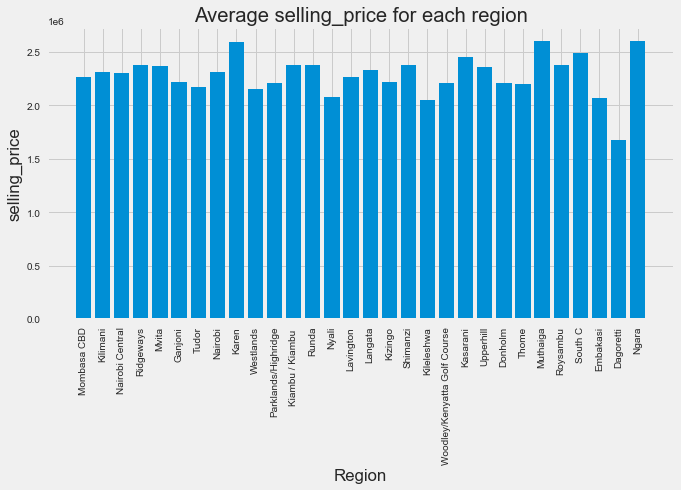

In [384]:
plot_region_bars('selling_price')

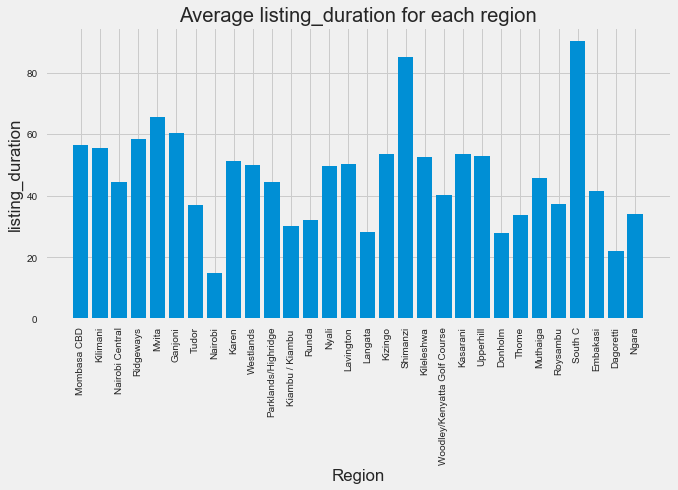

In [385]:
plot_region_bars('listing_duration')

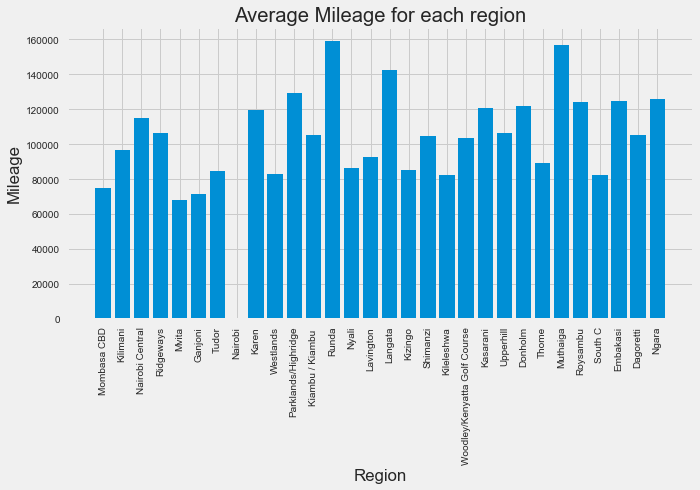

In [386]:
plot_region_bars('Mileage')

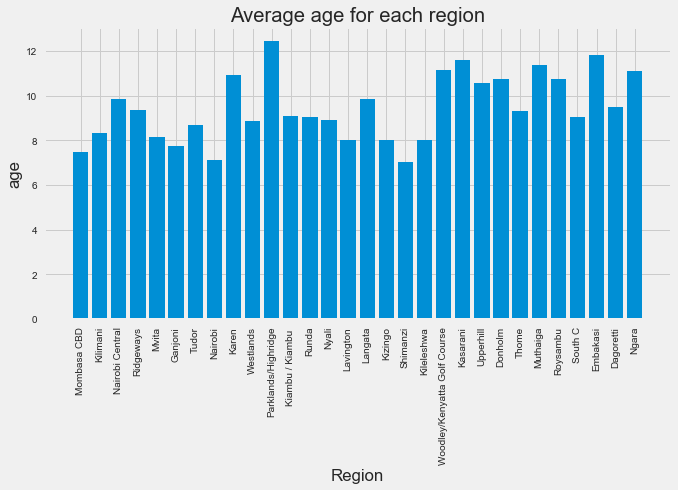

In [387]:
plot_region_bars('age')

# Further Analysis by region

In [409]:
df.region_name.value_counts()

Mombasa CBD        7831
Kilimani           1716
Nairobi Central    1339
Ridgeways          1073
Mvita               788
                   ... 
Gilgil                1
Nkuene                1
Bura                  1
Malindi               1
Township              1
Name: region_name, Length: 125, dtype: int64

In [414]:
regions=df_regions['region_name']

In [426]:
def plt_region(region_name, parameter):
    temp_df= region_group.get_group(region_name)[parameter].value_counts().rename_axis('value_name').to_frame('counts').reset_index()
    x=temp_df.value_name[:20]
    y=temp_df.counts[:20]

    plt.title(f'Cars in {region_name}')
    plt.xlabel(f'{parameter}')
    plt.ylabel('Number of cars')

    plt.xticks(rotation=90)
    plt.bar(x, y)

    plt.show()

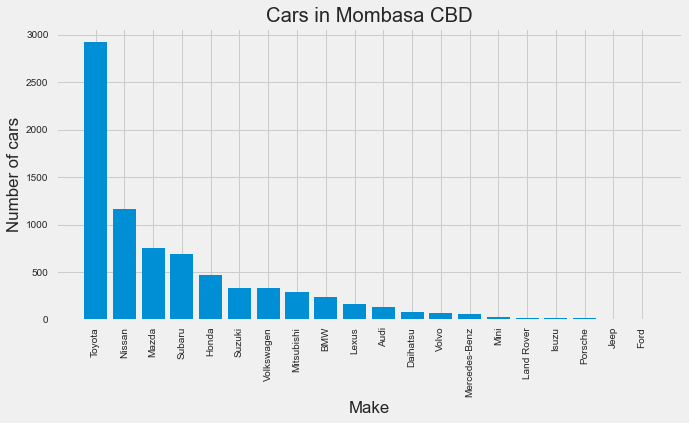

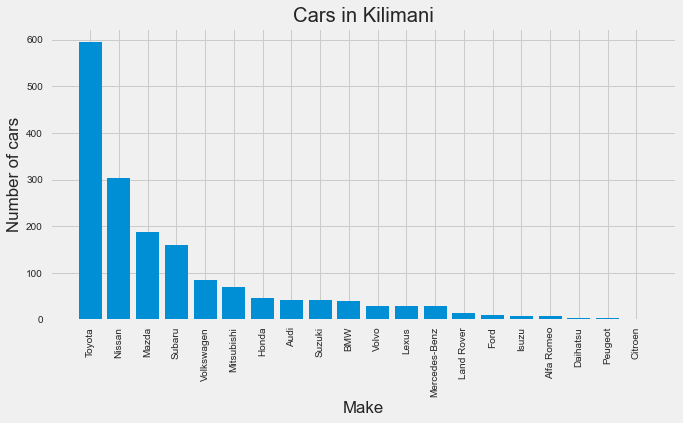

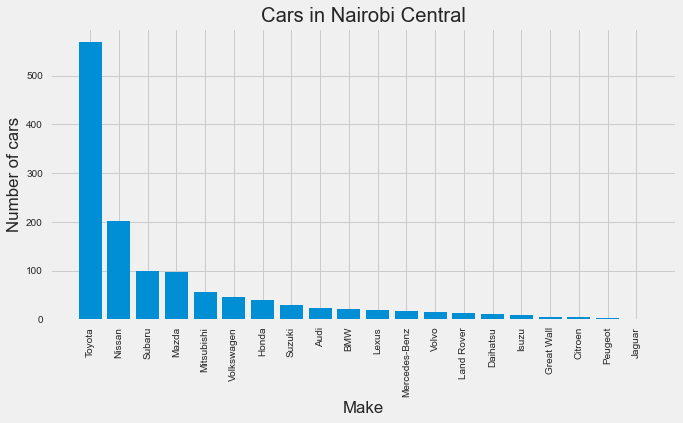

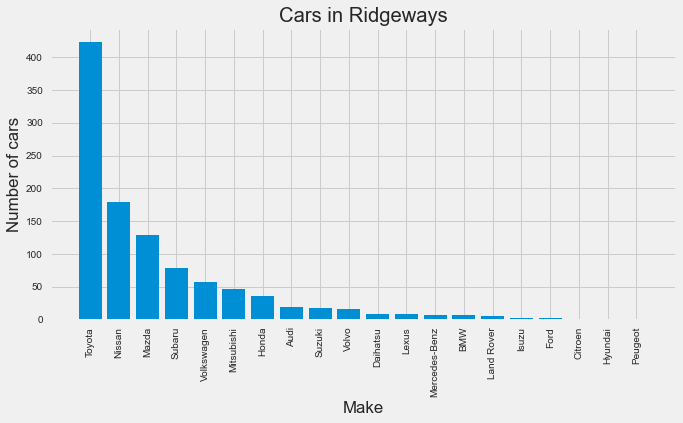

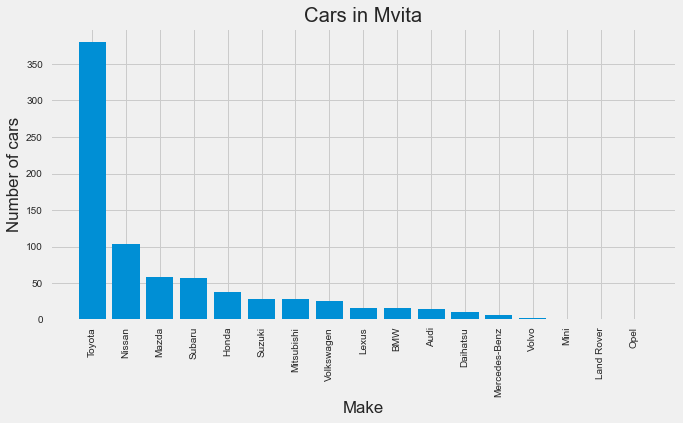

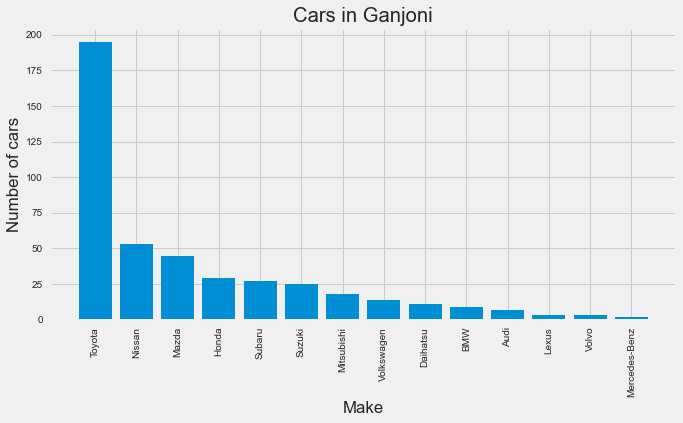

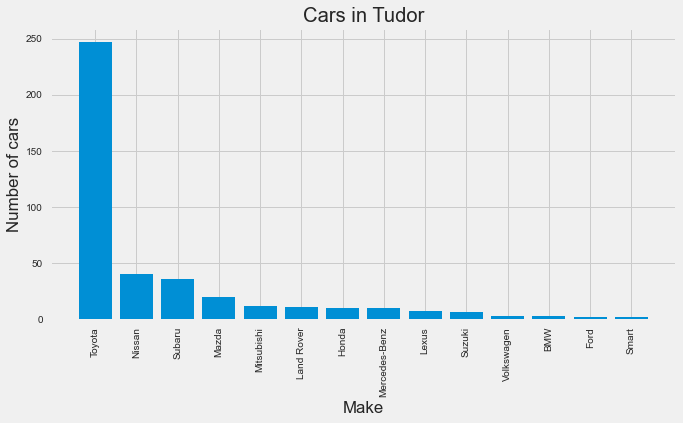

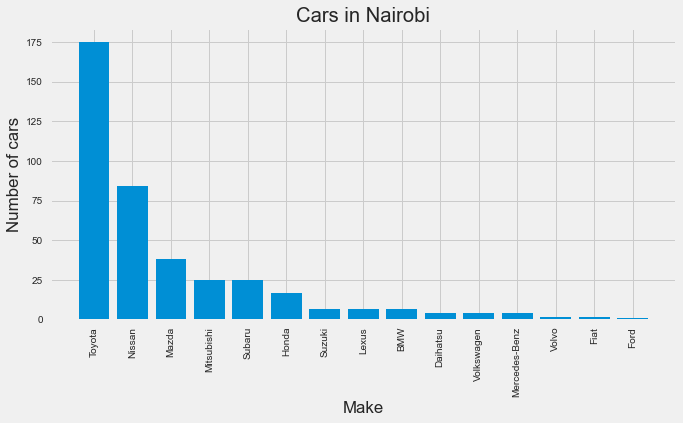

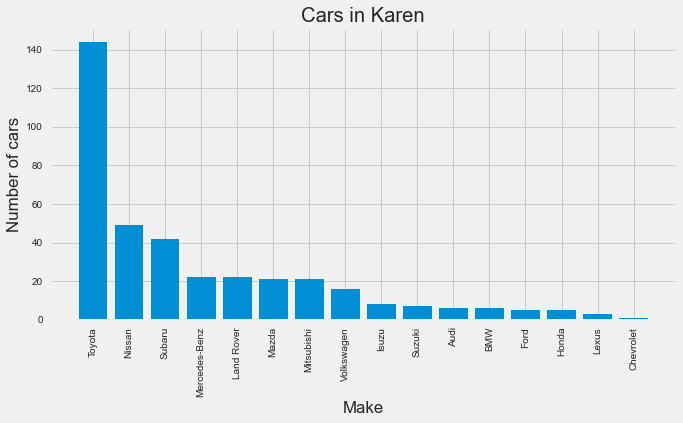

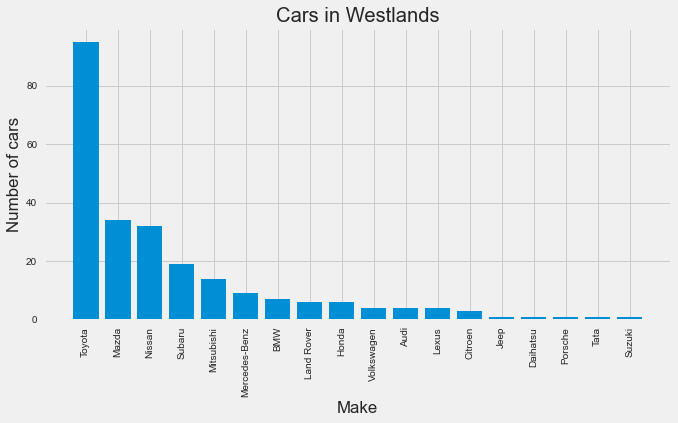

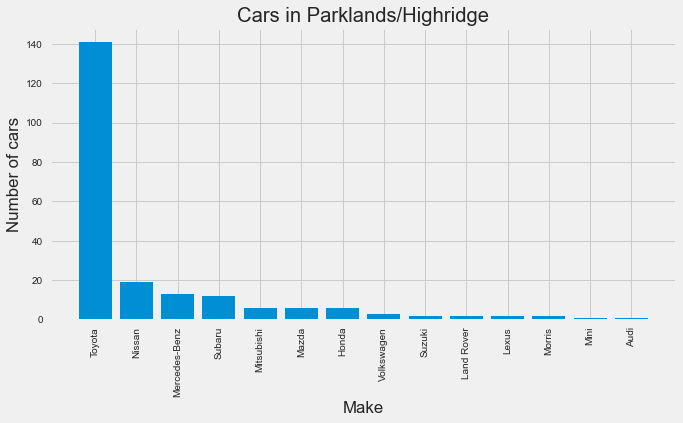

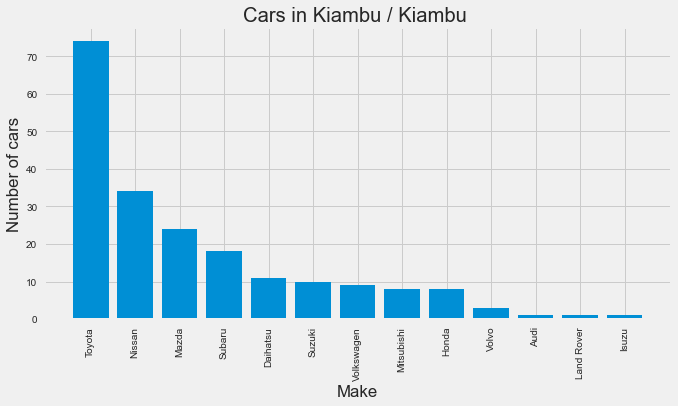

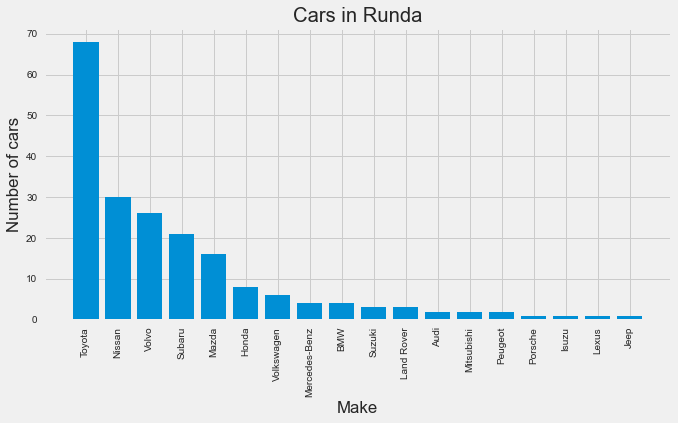

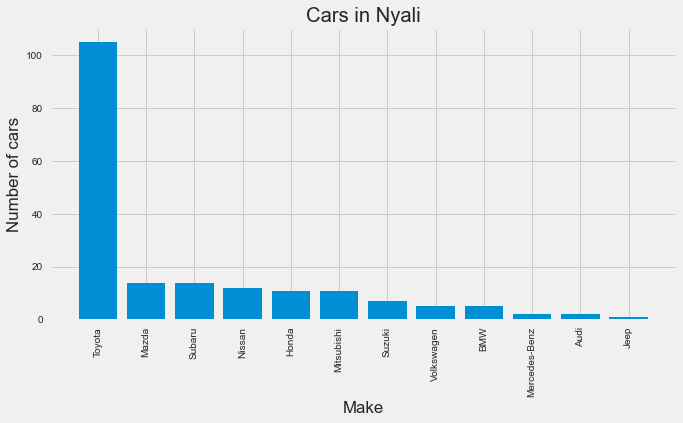

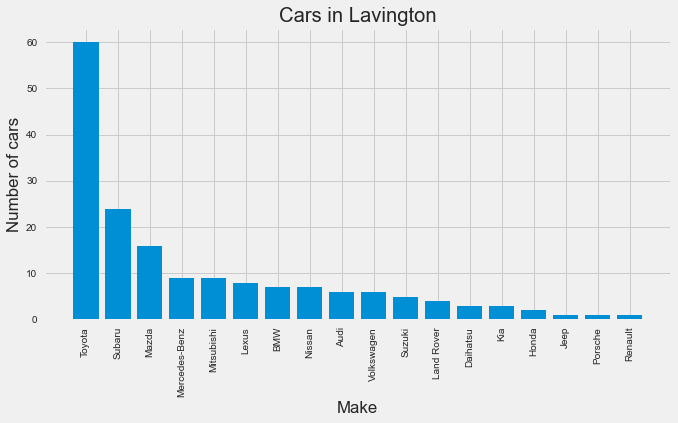

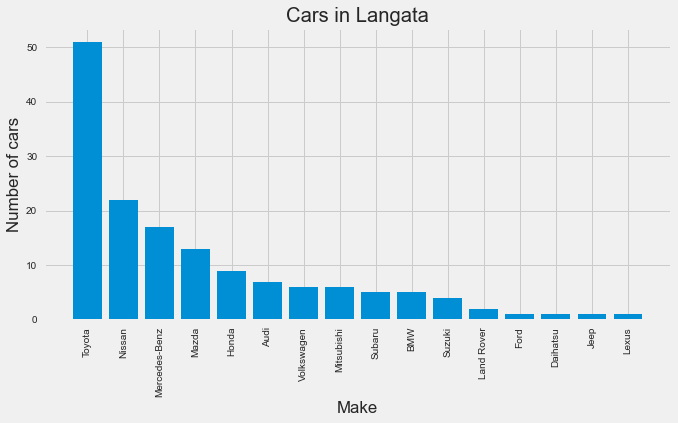

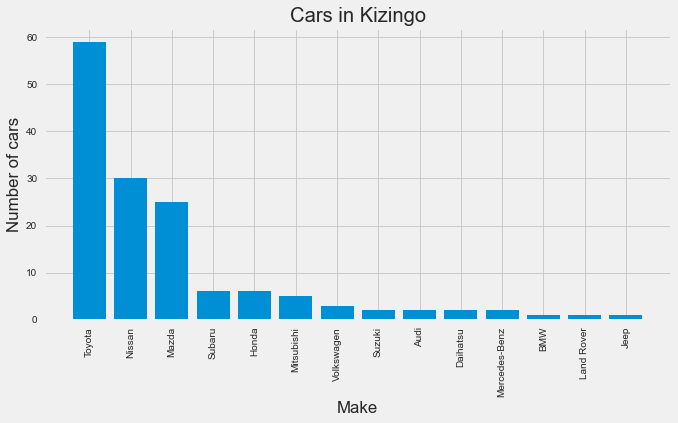

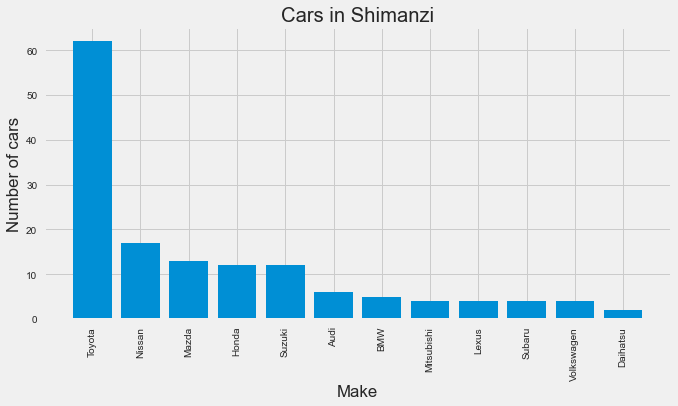

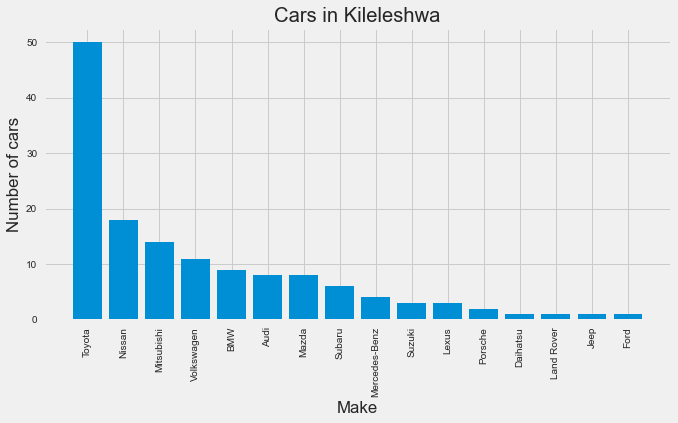

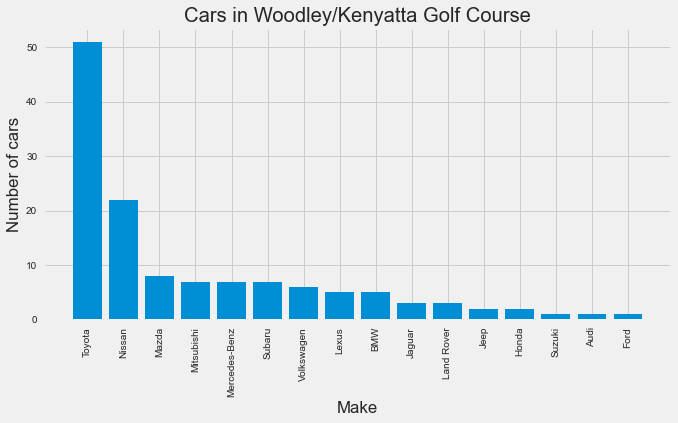

In [429]:
for item in regions[:20]:
    plt_region(item, 'Make')

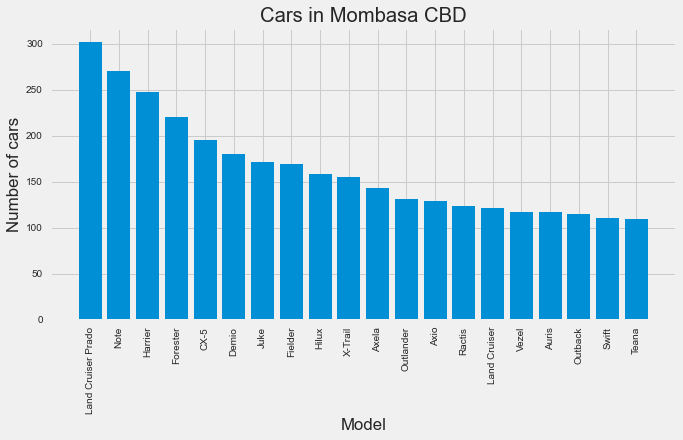

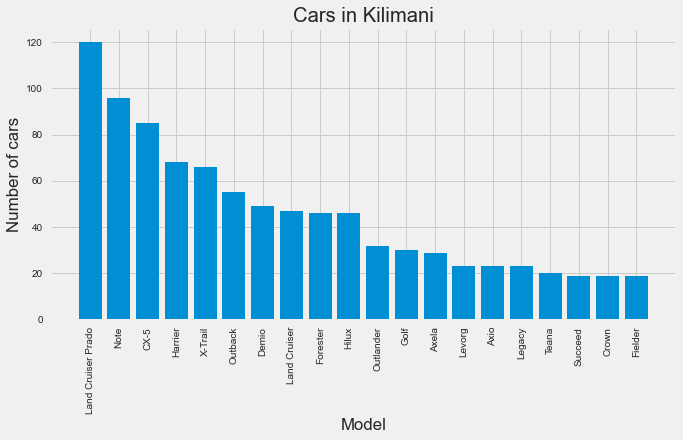

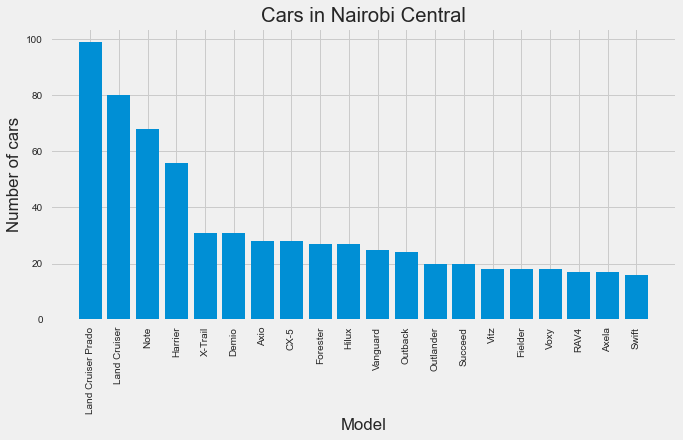

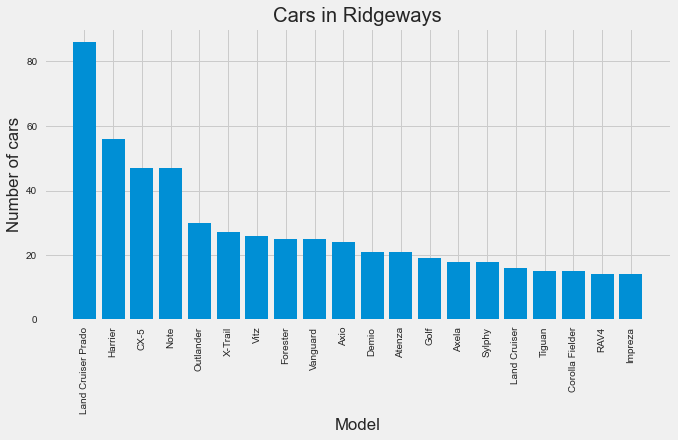

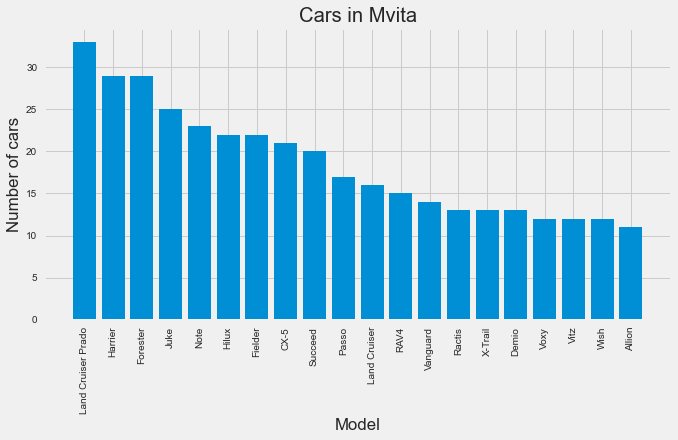

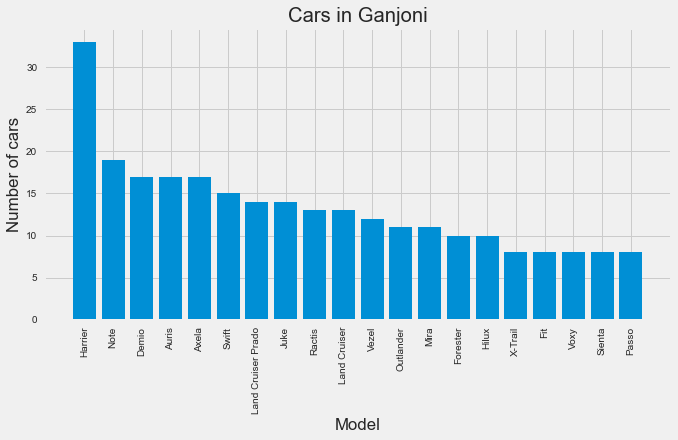

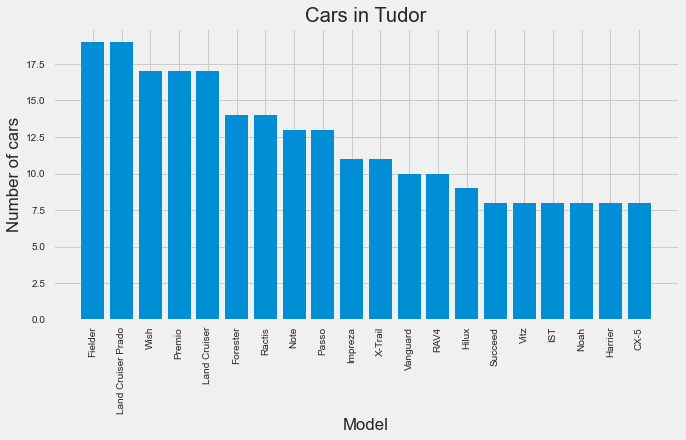

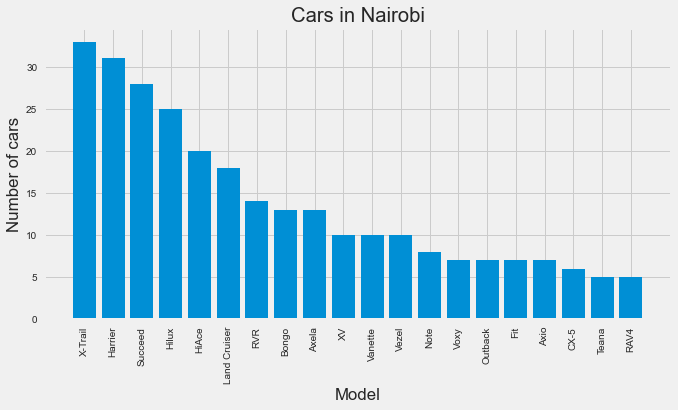

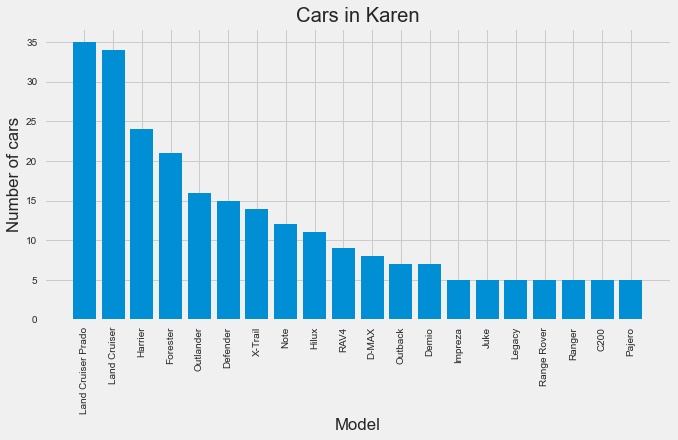

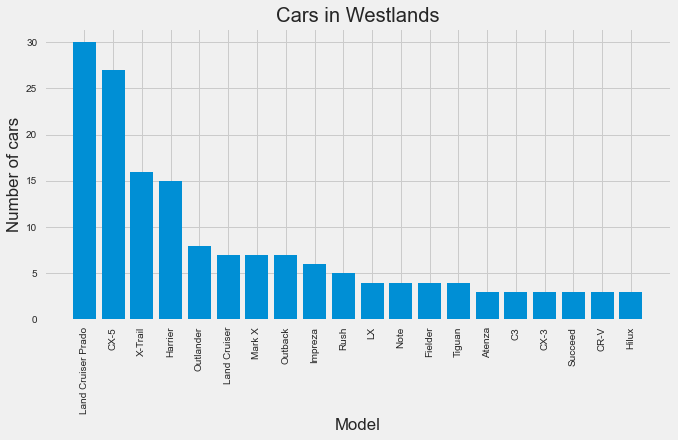

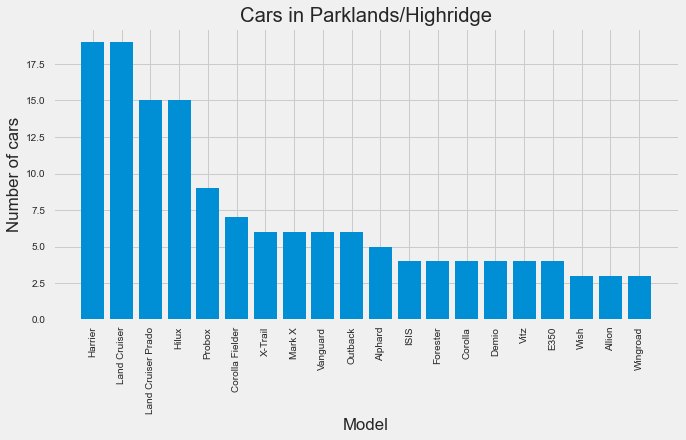

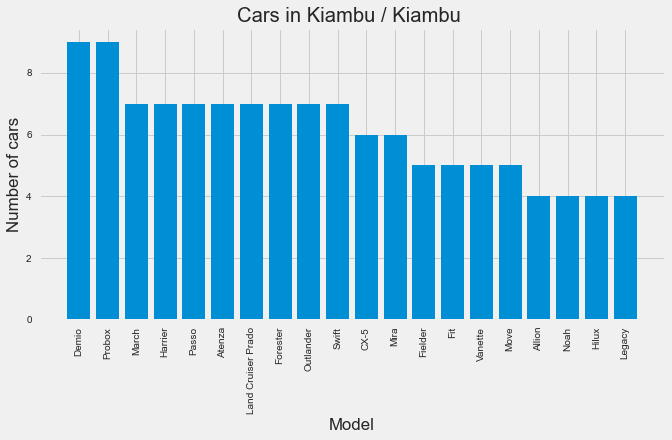

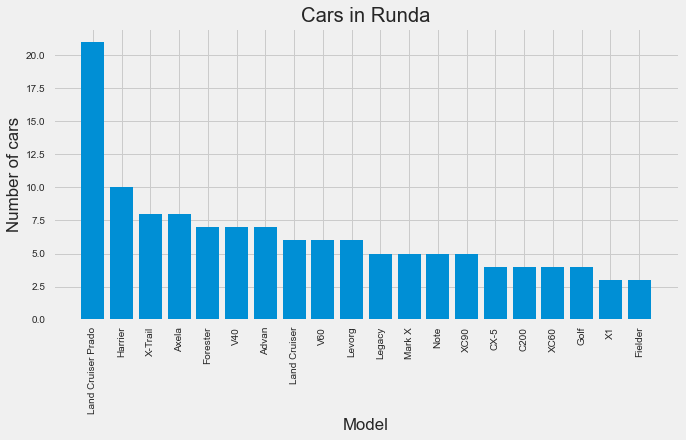

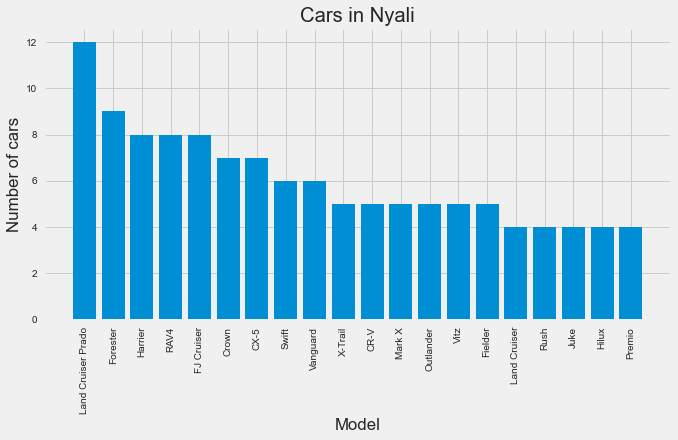

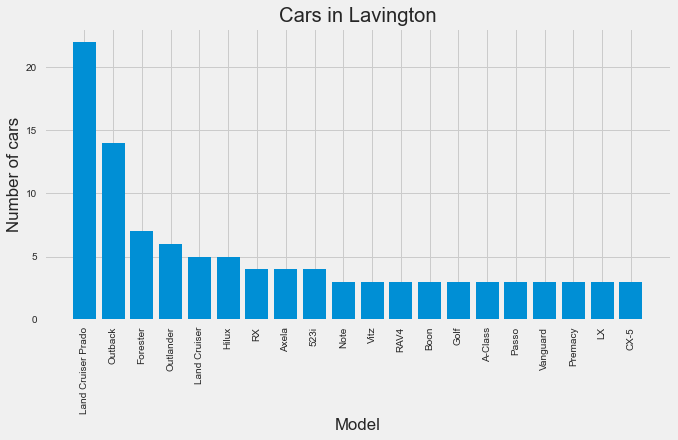

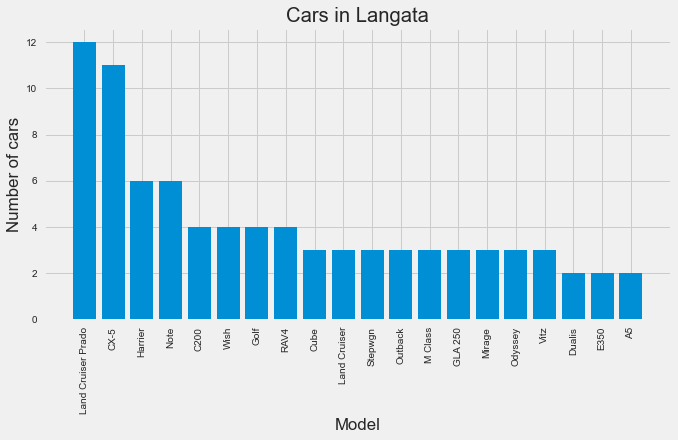

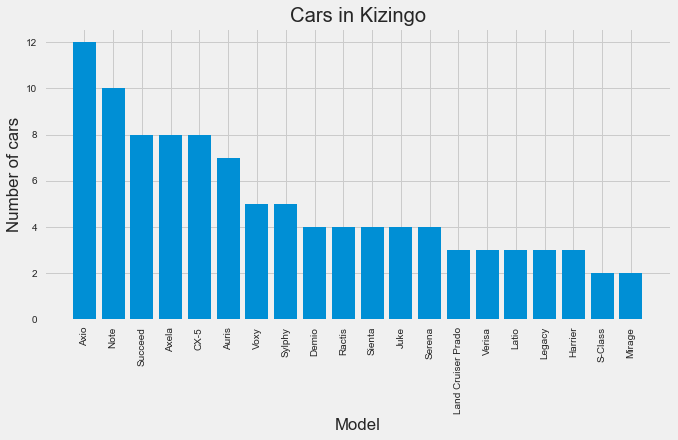

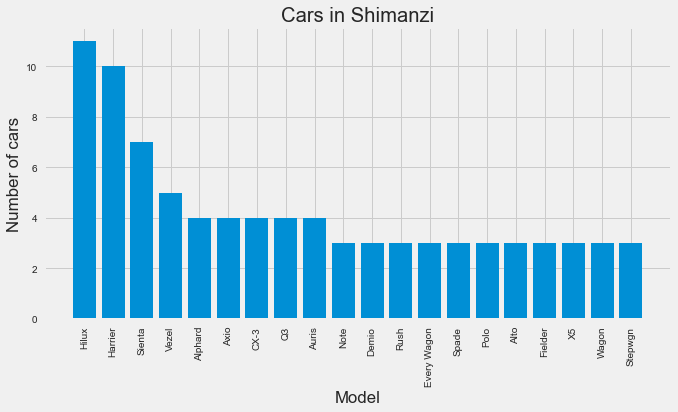

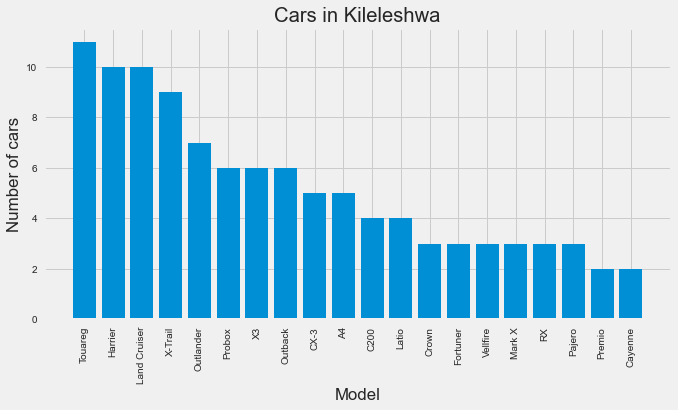

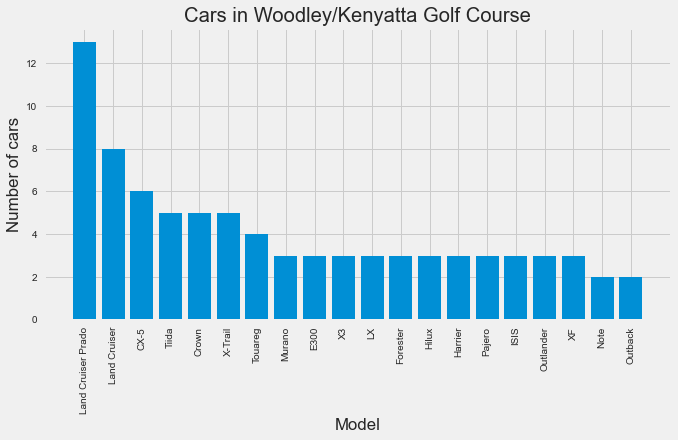

In [430]:
for item in regions[:20]:
    plt_region(item, 'Model')

In [466]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,region_name,min_est,max_est,age
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,Kilimani,1.40,1.45,10.0
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,Kilimani,2.50,2.65,6.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,Ridgeways,1.08,1.1,7.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,Langata,NaN,NaN,9.0
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,Nairobi Central,NaN,NaN,8.0


In [469]:
df['min_est'].mean()

164.67030023252644

(array([8447., 4385.,  814.,  594.,  142.,   90.,   26.,   82.,   18.,
          24.]),
 array([  250000.,  1924000.,  3598000.,  5272000.,  6946000.,  8620000.,
        10294000., 11968000., 13642000., 15316000., 16990000.]),
 <BarContainer object of 10 artists>)

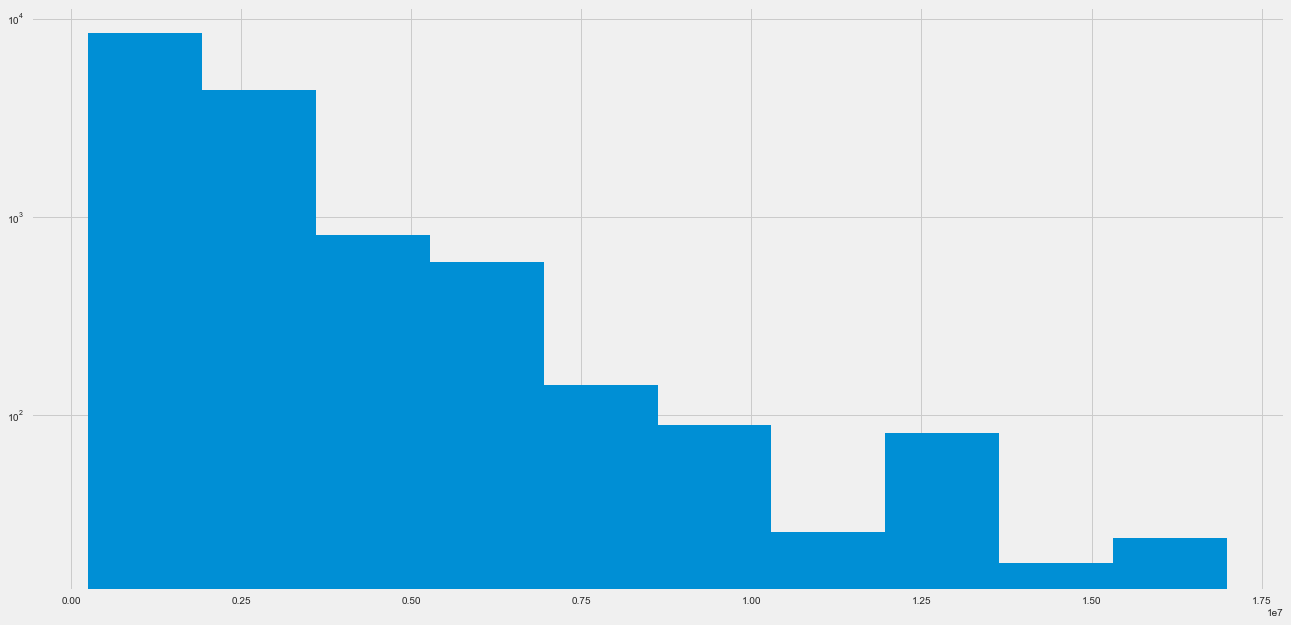

In [635]:
# filt
x=df.min_est
plt.hist(x, log=True)

(array([1.6191e+04, 1.3290e+03, 1.6200e+02, 8.8000e+01, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   70000.,  4563000.,  9056000., 13549000., 18042000., 22535000.,
        27028000., 31521000., 36014000., 40507000., 45000000.]),
 <BarContainer object of 10 artists>)

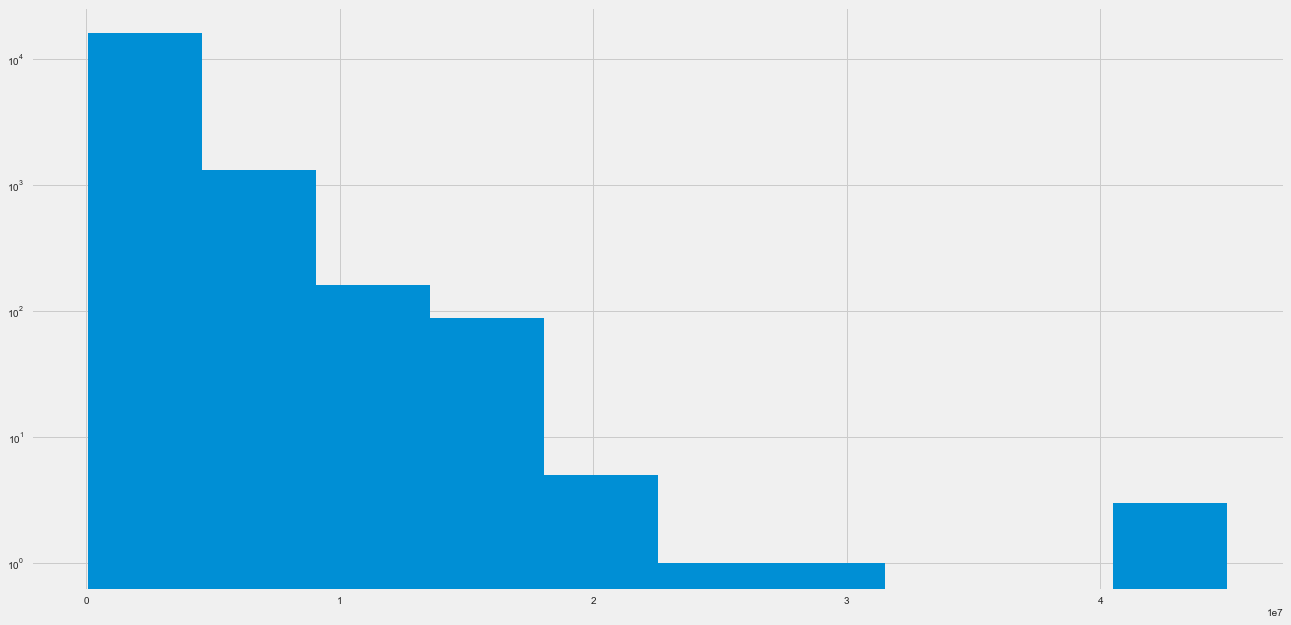

In [636]:
x=df.selling_price
plt.hist(x, log=True)

In [478]:
filt_min = df['min_est']>45
df.loc[filt_min]

df['min_est']=df['min_est'].apply(lambda x:x/1000 if x>45 else x)

In [ ]:
def to_float:
    